In [249]:
%load_ext autoreload
%autoreload 2
from spark import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [381]:
S = "S17"
inp = open("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/plink.{}.profile".format(S), 'rt')
out = csv.writer(open("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/plink.{}.profile.tsv".format(S), 'wt'), delimiter="\t")
for l in inp:
    out.writerow(l.split())

In [250]:
S = "S2"
PRS = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/plink.{}.profile.tsv".format(S), delimiter="\t")
ID2Score = dict(zip(PRS["IID"].values, PRS["SCORE"].values))
PRS.head(3)

,FID,IID,PHENO,CNT,CNT2,SCORE
0,SF0000003,SP0000002,1,71234,53782,-0.283424
1,SF0000003,SP0000003,2,71270,53629,-0.285093
2,SF0030253,SP0000006,1,71354,53411,-0.278563


/Users/jiayao/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jiayao/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


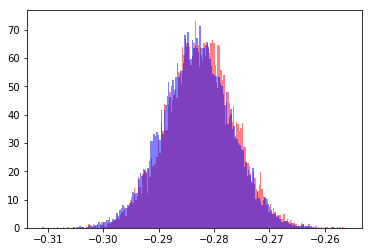

-0.2824866176894563 -0.2831723309109636


In [251]:
Case = PRS[PRS["PHENO"]==2]["SCORE"].values
NonCase = PRS[PRS["PHENO"]==1]["SCORE"].values
plt.hist(Case, color="red", alpha=0.5, bins=200, normed=1)
plt.hist(NonCase, color="blue", alpha=0.5, bins=200, normed=1)
plt.show()
mean_case = np.mean(Case)
mean_control = np.mean(NonCase)
print(mean_case, mean_control)

In [252]:
inp = open("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/GenoHQ.fam", 'rt')
out = csv.writer(open("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/GenoHQ.fam.tsv", 'wt'), delimiter="\t")
for l in inp:
    out.writerow(l.split())

In [253]:
# FamDat
FamDat = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/GenoHQ.fam.tsv", delimiter="\t", header=None)
FamDat.columns = ["FamID", "SampleID", "FatherID", "MotherID", "Gender", "Pheno"]
FamDat.head(3)

,FamID,SampleID,FatherID,MotherID,Gender,Pheno
0,SF0000003,SP0000002,0,0,2,1
1,SF0000003,SP0000003,0,SP0000002,1,2
2,SF0030253,SP0000006,0,0,1,1


In [254]:
MidPrs = []
ProbPrs = []
for row in FamDat.iterrows():
    row = row[1]
    try:
        if (row["Pheno"] == 2) and (row["FatherID"]!='0') and (row["MotherID"]!='0'):
            prob_prs = ID2Score[row["SampleID"]]
            FaPrs = ID2Score[row["FatherID"]]
            MoPrs = ID2Score[row["MotherID"]]
            mid_prs = (FaPrs+MoPrs)/2
            MidPrs.append(mid_prs)
            ProbPrs.append(prob_prs)
    except:
        print(row)

FamID       SF0001298
SampleID    SP0001298
FatherID    SP0023940
MotherID    SP0001238
Gender              2
Pheno               2
Name: 88, dtype: object
FamID       SF0001635
SampleID    SP0001635
FatherID    SP0087549
MotherID    SP0001587
Gender              1
Pheno               2
Name: 113, dtype: object
FamID       SF0002316
SampleID    SP0002316
FatherID    SP0003124
MotherID    SP0003118
Gender              1
Pheno               2
Name: 149, dtype: object
FamID       SF0002928
SampleID    SP0002928
FatherID    SP0002898
MotherID    SP0018500
Gender              1
Pheno               2
Name: 188, dtype: object
FamID       SF0003134
SampleID    SP0003134
FatherID    SP0005844
MotherID    SP0007900
Gender              2
Pheno               2
Name: 196, dtype: object
FamID       SF0003134
SampleID    SP0004092
FatherID    SP0005844
MotherID    SP0007900
Gender              1
Pheno               2
Name: 314, dtype: object
FamID       SF0004613
SampleID    SP0004613
FatherID    SP0

FamID       SF0024723
SampleID    SP0024723
FatherID    SP0029848
MotherID    SP0024682
Gender              2
Pheno               2
Name: 4257, dtype: object
FamID       SF0024794
SampleID    SP0024794
FatherID    SP0024852
MotherID    SP0024774
Gender              2
Pheno               2
Name: 4274, dtype: object
FamID       SF0025117
SampleID    SP0025117
FatherID    SP0033526
MotherID    SP0025101
Gender              1
Pheno               2
Name: 4344, dtype: object
FamID       SF0025124
SampleID    SP0025124
FatherID    SP0028310
MotherID    SP0025109
Gender              1
Pheno               2
Name: 4346, dtype: object
FamID       SF0025117
SampleID    SP0025164
FatherID    SP0033526
MotherID    SP0025101
Gender              2
Pheno               2
Name: 4352, dtype: object
FamID       SF0025577
SampleID    SP0025577
FatherID    SP0025741
MotherID    SP0025554
Gender              1
Pheno               2
Name: 4443, dtype: object
FamID       SF0025612
SampleID    SP0025612
FatherID

FamID       SF0044098
SampleID    SP0044098
FatherID    SP0044102
MotherID    SP0044096
Gender              1
Pheno               2
Name: 8676, dtype: object
FamID       SF0044197
SampleID    SP0044197
FatherID    SP0058097
MotherID    SP0044196
Gender              1
Pheno               2
Name: 8697, dtype: object
FamID       SF0044251
SampleID    SP0044251
FatherID    SP0044254
MotherID    SP0044250
Gender              1
Pheno               2
Name: 8702, dtype: object
FamID       SF0044823
SampleID    SP0044823
FatherID    SP0055148
MotherID    SP0044820
Gender              1
Pheno               2
Name: 8880, dtype: object
FamID       SF0045278
SampleID    SP0045278
FatherID    SP0045280
MotherID    SP0045277
Gender              1
Pheno               2
Name: 8970, dtype: object
FamID       SF0045429
SampleID    SP0045429
FatherID    SP0086574
MotherID    SP0045428
Gender              1
Pheno               2
Name: 8989, dtype: object
FamID       SF0046124
SampleID    SP0046124
FatherID

FamID       SF0084059
SampleID    SP0084059
FatherID    SP0091085
MotherID    SP0084058
Gender              1
Pheno               2
Name: 17410, dtype: object
FamID       SF0084116
SampleID    SP0084116
FatherID    SP0086404
MotherID    SP0084115
Gender              1
Pheno               2
Name: 17420, dtype: object
FamID       SF0085215
SampleID    SP0085215
FatherID    SP0085226
MotherID    SP0087053
Gender              1
Pheno               2
Name: 17607, dtype: object
FamID       SF0085269
SampleID    SP0085269
FatherID    SP0085304
MotherID    SP0085268
Gender              1
Pheno               2
Name: 17619, dtype: object
FamID       SF0086743
SampleID    SP0086743
FatherID    SP0087157
MotherID    SP0086742
Gender              1
Pheno               2
Name: 17923, dtype: object
FamID       SF0086915
SampleID    SP0086915
FatherID    SP0087944
MotherID    SP0086914
Gender              2
Pheno               2
Name: 17959, dtype: object
FamID       SF0088196
SampleID    SP0088196
Fa

FamID       SF0140899
SampleID    SP0140899
FatherID    SP0140994
MotherID    SP0140896
Gender              1
Pheno               2
Name: 26151, dtype: object
FamID       SF0141981
SampleID    SP0141981
FatherID    SP0141984
MotherID    SP0141977
Gender              1
Pheno               2
Name: 26269, dtype: object
FamID       SF0144316
SampleID    SP0144316
FatherID    SP0144319
MotherID    SP0144315
Gender              1
Pheno               2
Name: 26568, dtype: object
FamID       SF0151515
SampleID    SP0151515
FatherID    SP0151602
MotherID    SP0151514
Gender              2
Pheno               2
Name: 27128, dtype: object


6333


/Users/jiayao/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


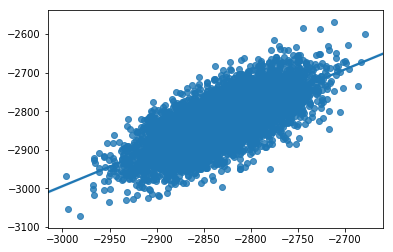

In [255]:
import seaborn
X = [x*10000 for x in MidPrs]
Y = [x*10000 for x in ProbPrs]
#seaborn.scatterplot(X, Y)
seaborn.regplot(X,Y)
print(len(ProbPrs))

In [256]:
SD_PRS_MP = np.std(MidPrs)
print(SD_PRS_MP)

0.004352093818358193


In [257]:
DEVs = []
for prob_prs, mid_prs in zip(ProbPrs, MidPrs):
    pTDT_dev = (prob_prs - mid_prs)/SD_PRS_MP
    DEVs.append(pTDT_dev)

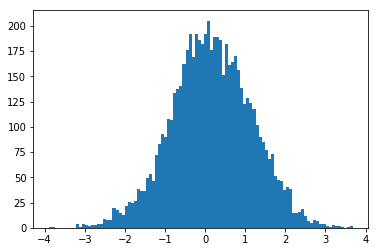

0.16182975557325543


In [258]:
plt.hist(DEVs, bins=100)
plt.show()
print(np.mean(DEVs))

In [259]:
MidPrs = []
SibPrs = []
for row in FamDat.iterrows():
    row = row[1]
    try:
        if (row["Pheno"] == 1) and (row["FatherID"]!='0') and (row["MotherID"]!='0'):
            sib_prs = ID2Score[row["SampleID"]]
            FaPrs = ID2Score[row["FatherID"]]
            MoPrs = ID2Score[row["MotherID"]]
            mid_prs = (FaPrs+MoPrs)/2
            MidPrs.append(mid_prs)
            SibPrs.append(sib_prs)
    except:
        continue
        print(row)

0.0043490842675230545


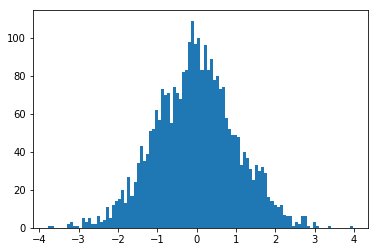

-0.02355359330207014
2932


In [260]:
SD_PRS_MP = np.std(MidPrs)
print(SD_PRS_MP)
DEVs = []
for sib_prs, mid_prs in zip(SibPrs, MidPrs):
    pTDT_dev = (sib_prs - mid_prs)/SD_PRS_MP
    DEVs.append(pTDT_dev)
plt.hist(DEVs, bins=100)
plt.show()
print(np.mean(DEVs))
print(len(DEVs))

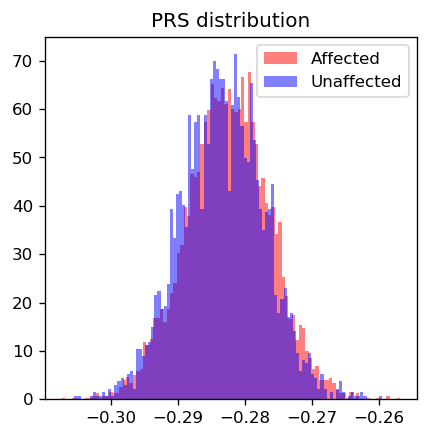

In [261]:
ALL = ProbPrs + SibPrs
bins = np.arange(min(ALL), max(ALL))
plt.figure(figsize=(4, 4), dpi=120)
plt.hist(ProbPrs, bins=100, density=True, color="red", alpha=0.5, label="Affected")
plt.hist(SibPrs, bins=100, density=True, color="blue", alpha=0.5, label="Unaffected")
plt.title("PRS distribution")
plt.legend()
plt.show()

In [262]:
t, p = stats.ttest_ind(ProbPrs, SibPrs)
print(t,p)

6.360122668811731 2.1112270535716257e-10


In [263]:
np.median(ProbPrs + SibPrs)

-0.282746

In [270]:
def logit(x):
    x = x+0.282746
    return 1 / (1+math.exp(-x))

In [276]:
print(logit(0))

0.5702193134579567


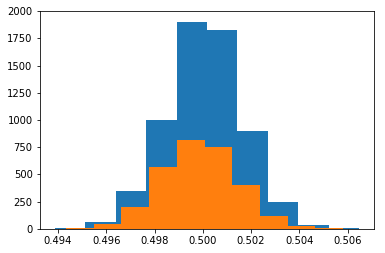

0.5190273172272225
0.5409276944065484
0.5259579060982191 0.6835402050728548


In [275]:
Pro_logit = [logit(x) for x in ProbPrs]
Sib_logit = [logit(x) for x in SibPrs]
plt.hist(Pro_logit)
plt.hist(Sib_logit)
plt.show()
Pro_logit_yes = [x for x in Pro_logit if x >= 0.5]
Sib_logit_yes = [x for x in Sib_logit if x < 0.5]
print(len(Pro_logit_yes)/len(Pro_logit))
print(len(Sib_logit_yes)/len(Sib_logit))
print( (len(Pro_logit_yes)+len(Sib_logit_yes))/ len(Pro_logit+Sib_logit), len(Pro_logit)/len(Pro_logit+Sib_logit))

In [317]:
LR = 0
LF = 0
for s in ProbPrs[:2000]:
    zr = logit(0)
    zf = logit(s)
    LR += math.log(zr)
    LF += math.log(zf)
for s in SibPrs[:2000]:
    zr = logit(0)
    zf = logit(s)
    LR += math.log(1-zr)
    LF += math.log(1-zf)
print(LR, LF)

-2812.428926809184 -2771.7145168186776


In [318]:
N = len(ProbPrs+SibPrs)
N = 4000
def N_Rsquare(LR, LF, N):
    a = 1 - math.pow(math.exp(LR-LF), 2/N)
    b = 1 - math.pow(math.exp(LR), 2/N)
    return a/b
print(N_Rsquare(LR, LF, N))

0.02015139602871041


In [269]:
N_pro, N_sib = len(ProbPrs), len(SibPrs)
_npro, _nsib = 0,0
print(N_pro, N_sib)
for s in ProbPrs:
    if s > -0.282746:
        _npro += 1
_nsib = 0
for s in SibPrs:
    if s  > -0.282746:
        _nsib += 1
#print(up, low, _npro, _nsib)
n11 = _npro
n10 = (N_pro-_npro)
n01 = _nsib
n00 = N_sib - _nsib
print(n11, n10, n01, n00)
odds = (n11/n10) / (n01/n00)
logodds = math.log(odds)
SE = math.sqrt(1/n11 + 1/n01 + 1/n10 + 1/n00)
ci_low = math.exp(logodds-1.96*SE)
ci_up = math.exp(logodds+1.96*SE)
CI =[ci_low, ci_up]
print(odds, CI)

6333 2932
3287 3046 1345 1587
1.273281553966809 [1.1662682334397687, 1.3901140999874968]


In [159]:
quntiles = []
for i in np.arange(0,1,0.1):
    q = np.quantile(ALL, i)
    quntiles.append(q)
quntiles.append(max(ALL))
print(quntiles)

[-0.30728099999999997, -0.2906824, -0.287927, -0.28589859999999995, -0.284312, -0.282746, -0.2810776, -0.279393, -0.2775586, -0.2749304, -0.256824]


In [160]:
N_pro, N_sib = len(ProbPrs), len(SibPrs)
print(N_pro, N_sib)

6333 2932


In [161]:
ODDs, CI = [], []
for i in range(len(quntiles)-1):
    low, up = quntiles[i], quntiles[i+1]
    _npro = 0
    for s in ProbPrs:
        if s > low and  s < up:
            _npro += 1
    _nsib = 0
    for s in SibPrs:
        if s > low and s< up:
            _nsib += 1
    #print(up, low, _npro, _nsib)
    n11 = _npro
    n10 = (N_pro-_npro)
    n01 = _nsib
    n00 = N_sib - _nsib
    odds = (n11/n10) / (n01/n00)
    logodds = math.log(odds)
    SE = math.sqrt(1/n11 + 1/n01 + 1/n10 + 1/n00)
    ci_low = math.exp(logodds-1.96*SE)
    ci_up = math.exp(logodds+1.96*SE)
    ODDs.append(odds) 
    CI.append([ci_low, ci_up])
    #print(odds)

In [162]:
print(ODDs, CI)

[0.785489826502078, 0.7599116182035772, 0.9262779914240012, 1.0022754960076699, 0.9347332658044781, 1.017057979698934, 1.1050821429142739, 1.0758823381647367, 1.200674215938373, 1.371053228338054] [[0.6817849124552325, 0.9049690837486489], [0.6598564287900228, 0.8751383517467227], [0.8017211413904164, 1.070186219498313], [0.8659828615502984, 1.1600185344303995], [0.8088406113113744, 1.0802205848503719], [0.8785993459067515, 1.1773363352572563], [0.9527439184518542, 1.2817783655574349], [0.928229712602527, 1.2470219277180996], [1.0330458180093827, 1.3955030335412801], [1.1751504411087117, 1.5996138785113245]]


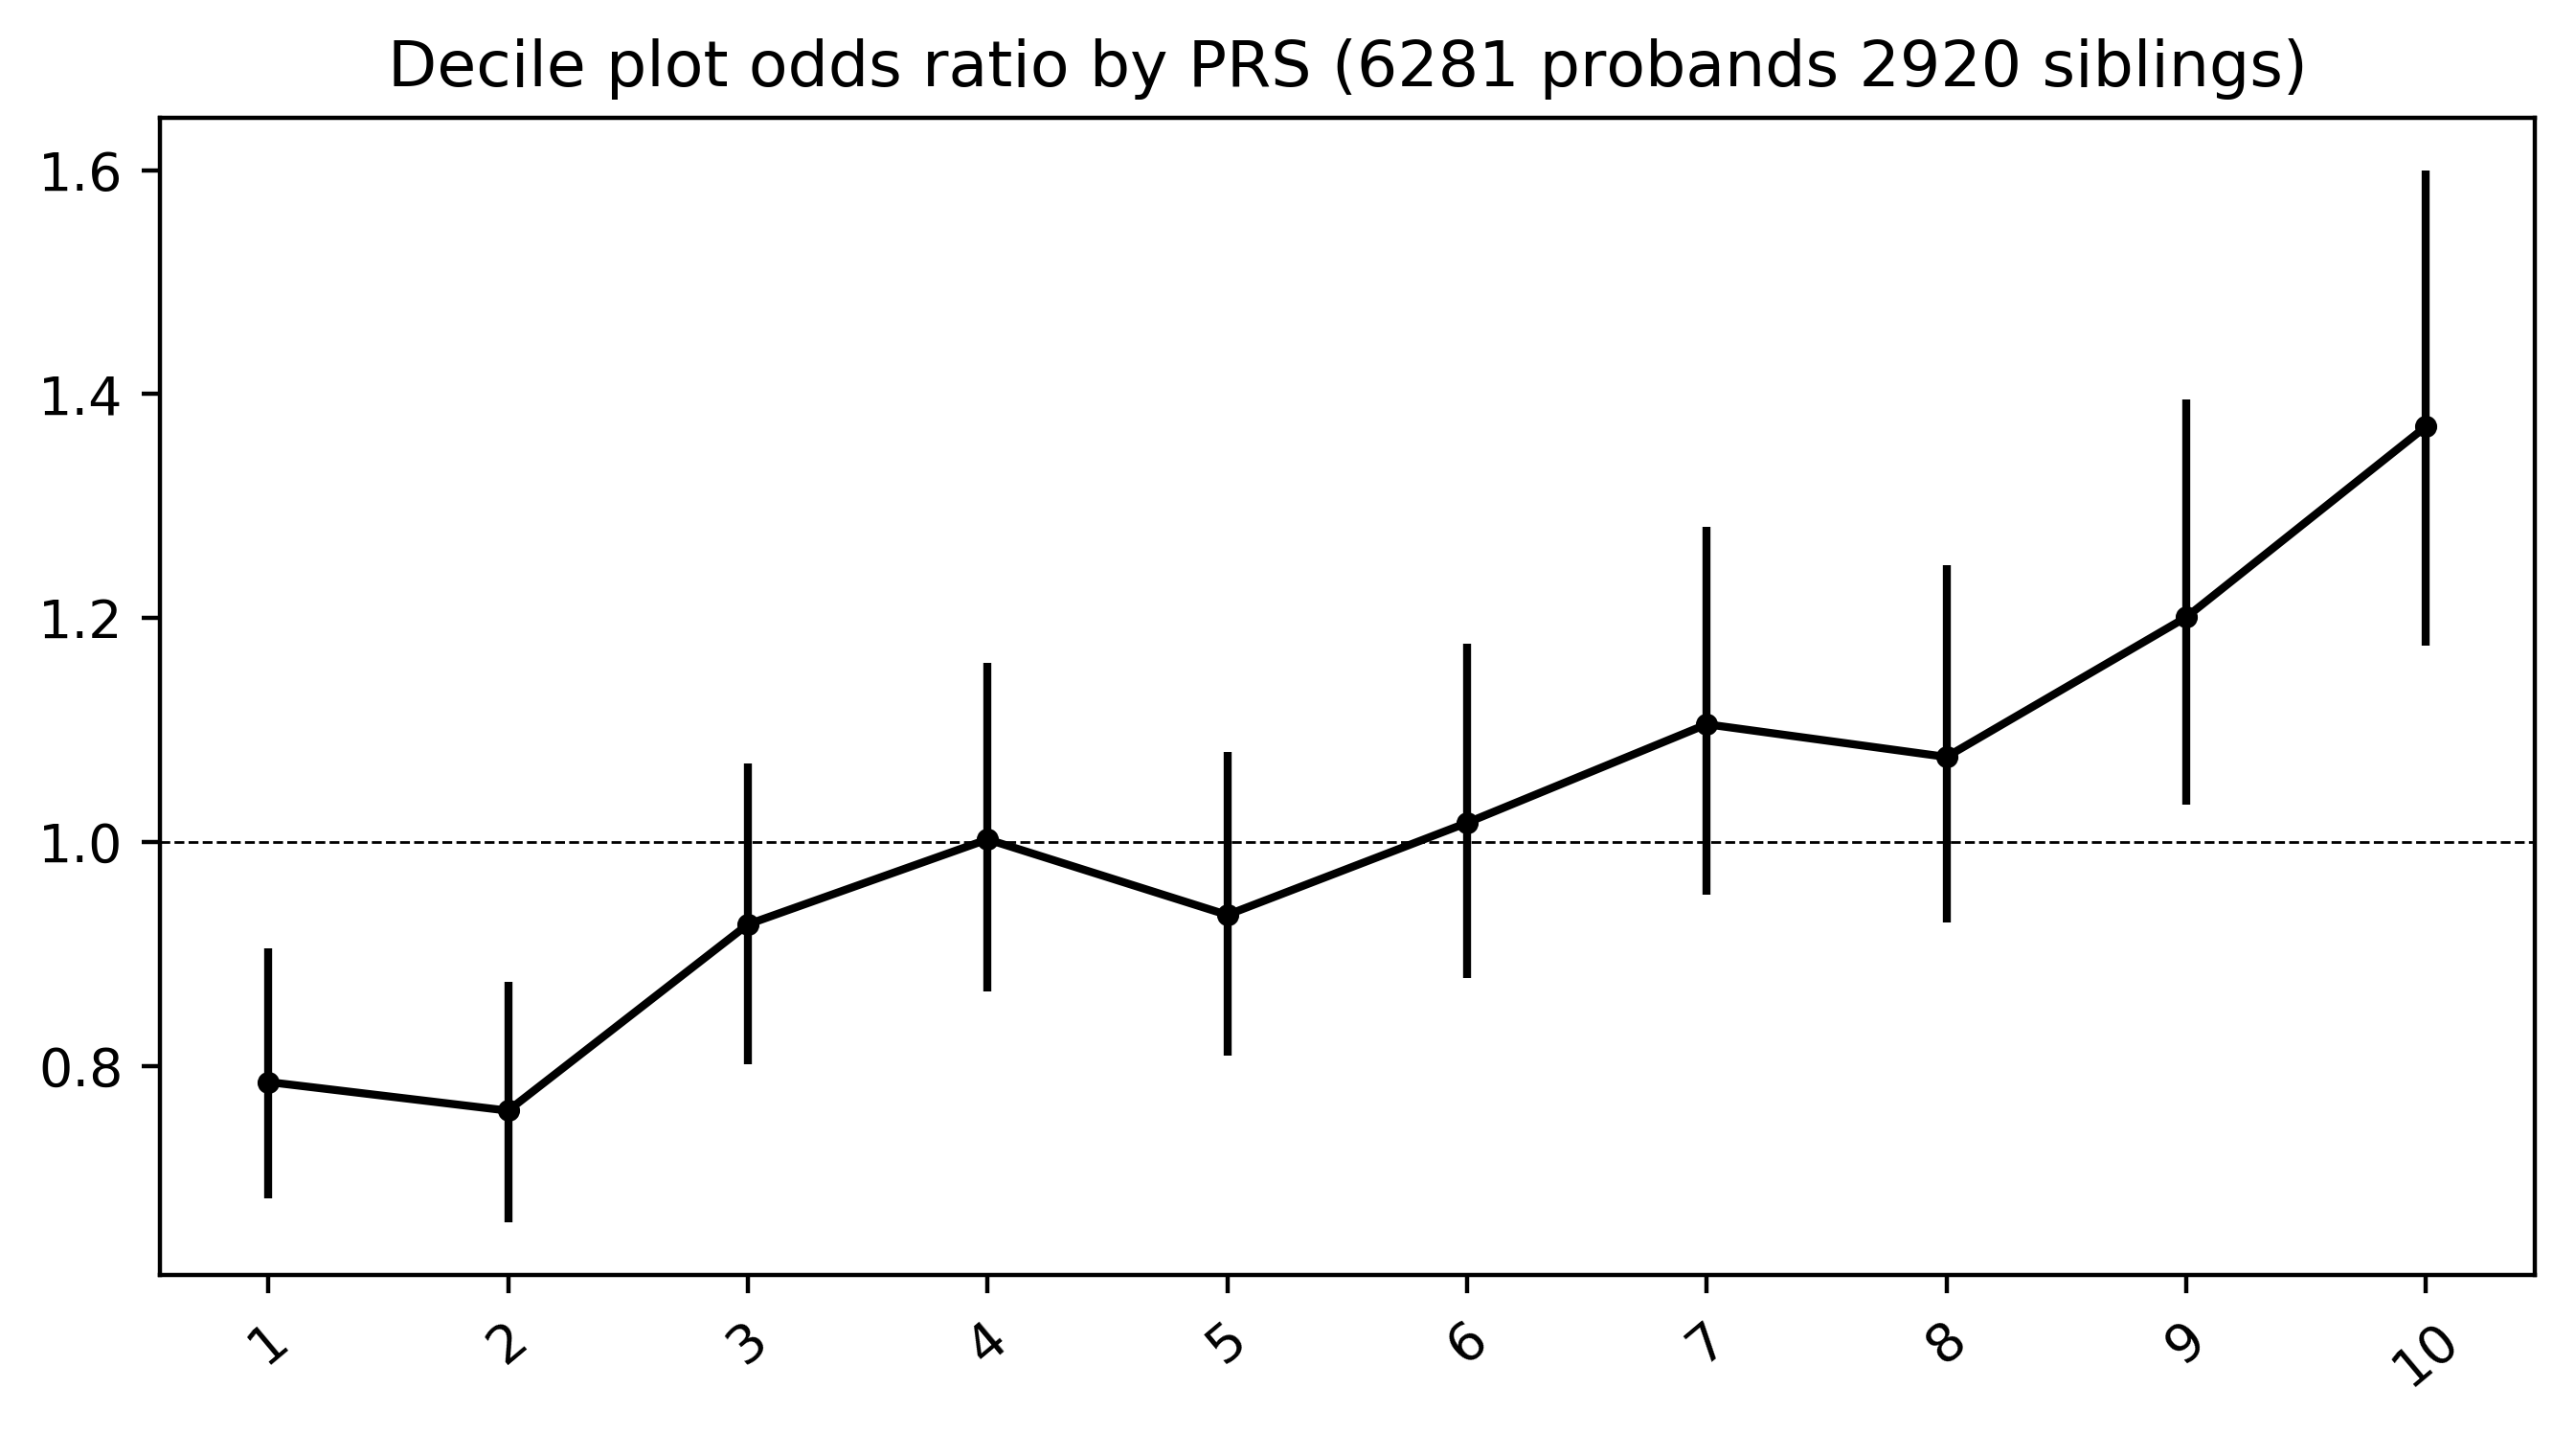

In [163]:
fig, ax = plt.subplots(figsize=(8,4), dpi=400)
indice = []
ax.axhline(y=1, c="black", linestyle = "--", linewidth=0.5)
for i, (odds, ci) in enumerate(zip(ODDs, CI)):
    indice.append(i+1)
    ax.scatter(i+1, odds, marker="o", s=10, color="black")
    ax.vlines(i+1, ci[0], ci[1])
labels = range(1,12,1)
ax.set_xticks(np.arange(1, 11, 1.0))
ax.set_xticklabels(labels, fontsize=10, rotation=40)
plt.plot(indice, ODDs, color="black")
plt.title("Decile plot odds ratio by PRS (6281 probands 2920 siblings)")
plt.show()

In [16]:
Dat = []
for S in ["S1", "S2", "S3", "S4", "S5", "S6", "S7"]:
    pro, sib = processPRS_PTDT(S)
    #print(pro_dev, sib_dev)
    Dat.append([pro, sib])
    print(pro, sib)

(0.16496900538255638, 0.012737916992641988, 7.159519366455727e-38) (-0.011415857711535221, 0.018808263213582803, 0.5439938792470111)
(0.16227158375171608, 0.012758747882139557, 1.3354568096804396e-36) (-0.02400749147994241, 0.01910508731608692, 0.20907647251555098)
(0.13071953061317268, 0.012657272244610007, 8.411325526924726e-25) (-0.0383233597990144, 0.018787952856994895, 0.041496571663627864)
(0.08266842270967258, 0.012582910229864004, 5.458861942236865e-11) (-0.02434180479171355, 0.018151937213305012, 0.18009857720612543)
(0.05249173451879941, 0.012158304200731527, 1.605858058003606e-05) (-0.016522875908666027, 0.01752571160296013, 0.3459544760262597)
(0.040101401398461856, 0.012166098160265993, 0.0009865305291177353) (-0.02344345197786689, 0.017442815599332747, 0.17912174236702547)
(0.04244676605687182, 0.012440215346469986, 0.000649460206280663) (-0.0334561547030813, 0.018084346787587458, 0.0644595391551593)


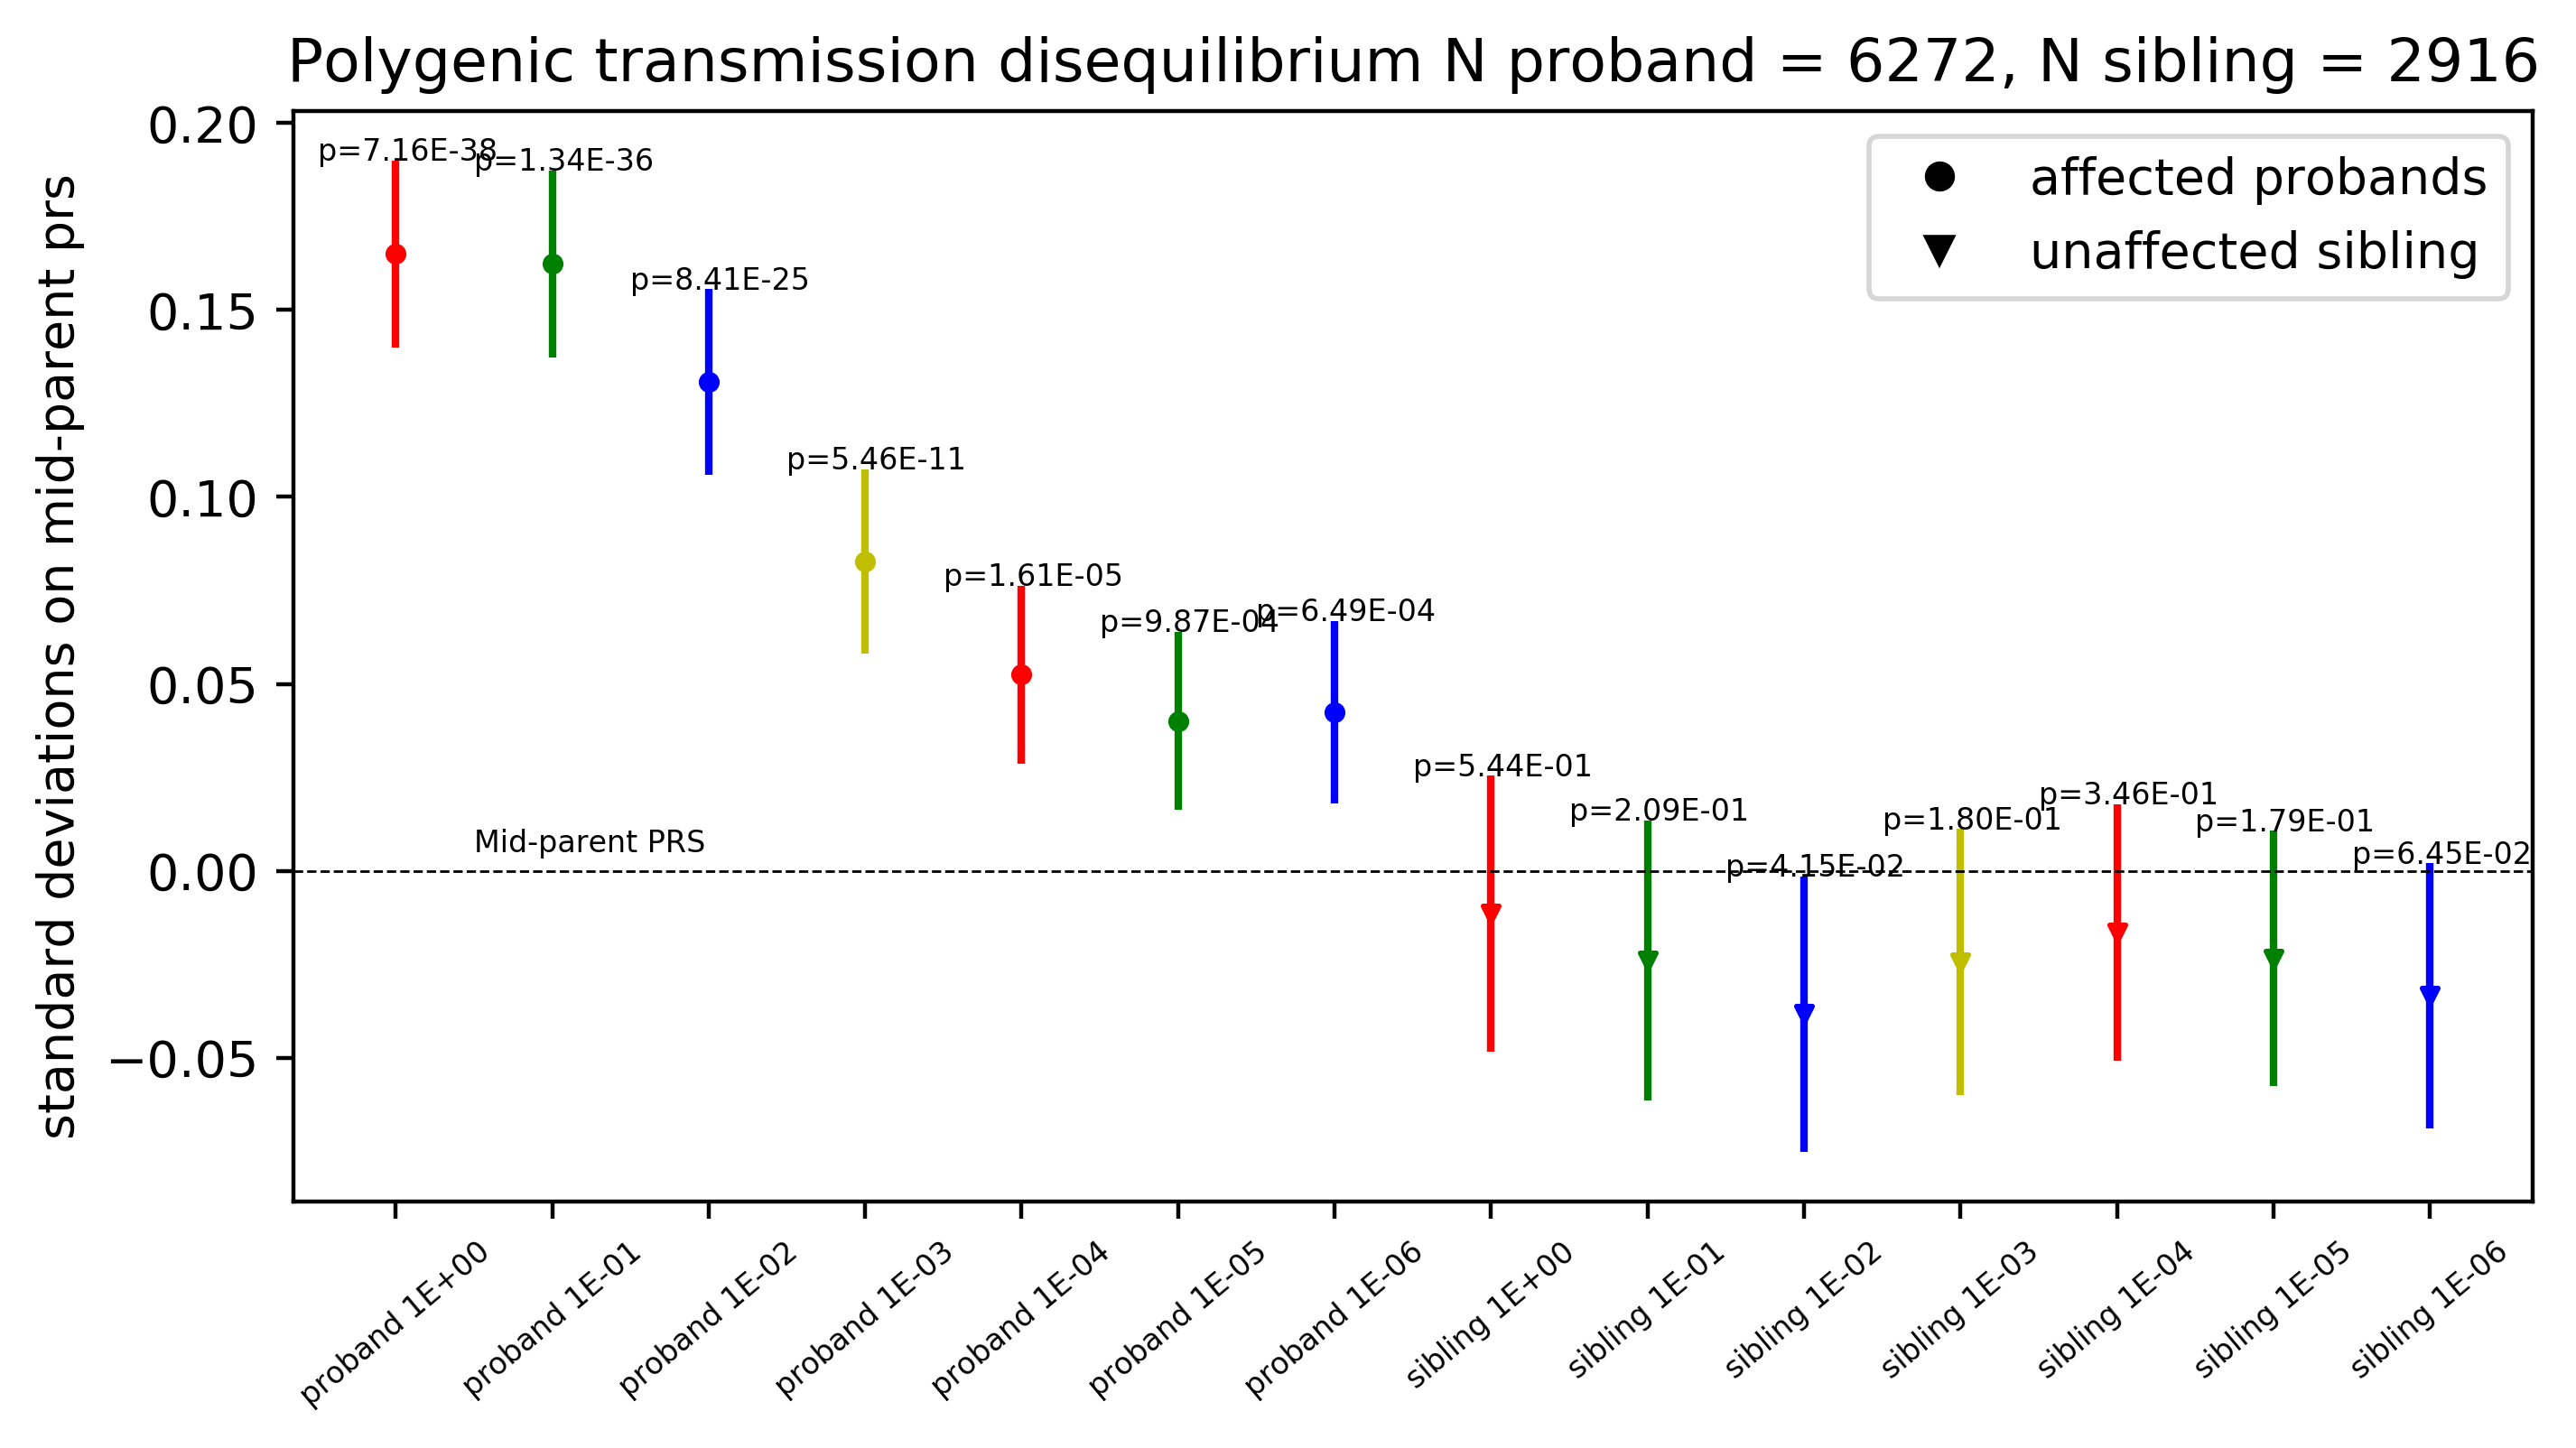

In [143]:
from decimal import Decimal
fig, ax = plt.subplots(figsize=(8,4), dpi=400)
ax.axhline(y=0, c="black", linestyle = "--", linewidth=0.5)
ax.text(0.5, 0.005, "Mid-parent PRS", fontsize=6)
colors = "rgby"
colors = cycle(colors)
for i, (S, (pro, sib)) in enumerate(zip(["S1", "S2", "S3", "S4", "S5", "S6", "S7"], Dat)):
    color = next(colors)
    pro_dev, pro_sd, pro_p = pro
    sib_dev, sib_sd, sib_p = sib
    
    ax.vlines(i, pro_dev-1.96*pro_sd, pro_dev+1.96*pro_sd, color = color)
    ax.scatter(i, pro_dev, marker="o", color = color, s=10)
    ax.text(i-0.5, pro_dev+1.96*pro_sd, 'p=%.2E' % Decimal(pro_p), fontsize=6)
    
    ax.vlines(i+7, sib_dev-1.96*sib_sd, sib_dev+1.96*sib_sd, color = color)
    ax.scatter(i+7, sib_dev, marker="v", color = color, s=10)
    ax.text(i+6.5, sib_dev+1.96*sib_sd, 'p=%.2E' % Decimal(sib_p), fontsize=6)
labels = ['proband %.E' % Decimal(x) for x in [1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]] + \
         ['sibling %.E' % Decimal(x) for x in [1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]]
plt.title("Polygenic transmission disequilibrium N proband = 6272, N sibling = 2916")
ax.set_xticks(np.arange(0, i*2+2, 1.0))
ax.set_xticklabels(labels, fontsize=6, rotation=40)
plt.ylabel("standard deviations on mid-parent prs")

withDNM = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=5, label='affected probands')
withoutDNM = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                          markersize=5, label='unaffected sibling')
plt.legend(handles=[withDNM, withoutDNM])

plt.show()

In [181]:
DNV = pd.read_excel("/Users/jiayao/Downloads/BurdenTADASummary.xlsx", sheetname="CaseDNMs")
TADA = pd.read_excel("/Users/jiayao/Downloads/BurdenTADASummary.xlsx", sheetname="TADA")
TADA.head(10)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,GeneID,GeneName,pLI,DDG2P,SFARI,LGD_Rate,DMis_Rate,LGD_Pub,Dmis_Pub,LGD_SPARK,Dmis_SPARK,BF1.LGD,BF1.Dmis,BF1,Qval1,BF2.LGD,BF2.Dmis,BF2,Qval2
0,ENSG00000136531,SCN2A,1.00,DDG2P(confirmed|loss of function);DDG2P(confir...,"SFARI(Score=10|FDR=9.81E-09,3.57E-10,3.70E-11)",7.600000e-06,0.000025,6,7,7,3,4.350000e+06,88300.0,3.840000e+11,2.050000e-11,8.490000e+14,3420000.0,2.900000e+21,0.000000e+00
1,ENSG00000100888,CHD8,1.00,DDG2P(probable|loss of function),"SFARI(Score=11|FDR=1.08E-05,3.06E-10,0)",1.220000e-05,0.000035,11,3,5,3,4.650000e+12,17.7,8.230000e+13,1.900000e-13,6.320000e+17,288.6,1.820000e+20,0.000000e+00
2,ENSG00000117139,KDM5B,0.00,DDG2P(confirmed|loss of function),"SFARI(Score=20|FDR=0.2122812476,2.29E-05,4.44E...",9.790000e-06,0.000022,6,4,5,5,2.620000e+06,260.4,6.830000e+08,1.020000e-08,5.370000e+11,852000.0,4.570000e+17,0.000000e+00
3,ENSG00000101126,ADNP,1.00,DDG2P(confirmed|loss of function),"SFARI(Score=11|FDR=0.0004245127,3.25E-05,2.05E...",4.020000e-06,0.000006,7,0,6,1,2.040000e+08,0.7,1.460000e+08,2.960000e-08,7.880000e+15,2.3,1.800000e+16,2.220000e-16
4,ENSG00000197283,SYNGAP1,1.00,DDG2P(confirmed|loss of function);DDG2P(confir...,"SFARI(Score=11|FDR=6.63E-08,3.73E-07,6.09E-10)",5.930000e-06,0.000022,7,2,3,2,1.260000e+08,6.9,8.710000e+08,6.010000e-09,2.080000e+11,45.4,9.470000e+12,3.310000e-13
5,ENSG00000171862,PTEN,0.98,DDG2P(confirmed|loss of function);DDG2P(confir...,"SFARI(Score=11|FDR=0.0400545977,0.0007106466,9...",7.410000e-07,0.000003,2,3,4,2,2.062000e+02,172.1,3.550000e+04,8.050000e-05,1.880000e+07,8160.0,1.540000e+11,1.730000e-11
6,ENSG00000143442,POGZ,1.00,DDG2P(confirmed|loss of function),"SFARI(Score=11|FDR=0.001506652,4.68E-05,6.91E-05)",6.580000e-06,0.000017,4,2,5,1,1.710000e+04,9.5,1.630000e+05,2.280000e-05,7.150000e+09,16.4,1.170000e+11,3.390000e-11
7,ENSG00000173575,CHD2,1.00,DDG2P(confirmed|loss of function),"SFARI(Score=11|FDR=NA,6.74E-06,1.99E-06)",9.850000e-06,0.000023,6,1,2,4,2.590000e+06,1.4,3.730000e+06,1.060000e-06,7.630000e+07,255.9,1.950000e+10,1.300000e-10
8,ENSG00000251322,SHANK3,1.00,DDG2P(probable|loss of function),"SFARI(Score=11|FDR=0.2905725875,0.0009855282,0...",5.950000e-06,0.000036,6,1,2,3,6.410000e+06,0.8,5.080000e+06,5.380000e-07,5.010000e+08,10.2,5.110000e+09,4.560000e-10
9,ENSG00000114861,FOXP1,1.00,DDG2P(confirmed|loss of function),"SFARI(Score=21|FDR=NA,0.0424344251,0.0245852612)",3.770000e-06,0.000008,5,0,2,3,5.690000e+05,0.7,3.720000e+05,1.050000e-05,7.790000e+07,54.1,4.220000e+09,7.820000e-10


In [193]:
DNV.head(3)
CandiG = TADA[TADA["Qval2"]<0.05]["GeneName"].values
print(CandiG, len(CandiG))

['SCN2A' 'CHD8' 'KDM5B' 'ADNP' 'SYNGAP1' 'PTEN' 'POGZ' 'CHD2' 'SHANK3'
 'FOXP1' 'KMT5B' 'ARID1B' 'DYRK1A' 'ASH1L' 'GIGYF1' 'GRIN2B' 'ANK2' 'CUL3'
 'SMARCC2' 'MED13' 'STXBP1' 'BRSK2' 'DYNC1H1' 'NAA15' 'KMT2A' 'DNMT3A'
 'TBR1' 'DMWD' 'SHMT1' 'ASXL3' 'WDFY3' 'PHF21A' 'RFX3' 'PBX1' 'TAOK1'
 'KMT2C' 'TBL1XR1' 'AHDC1' 'TLK2' 'NXNL1' 'MED13L' 'PHF3' 'MIB1' 'DSCAM'
 'MYT1L' 'TCF7L2' 'NF1' 'MBD5' 'HNRNPD' 'TGM1' 'ATP2B2' 'IRF2BPL' 'TSC1'
 'TRIP12' 'RORB' 'ZC3H4' 'GAB2' 'PRKAR1B' 'TCF4' 'CTCF' 'SKI' 'CSNK2A1'
 'CTNNB1' 'CAPRIN1' 'CASZ1' 'MEF2C' 'EP300' 'TNPO3' 'SETD1A' 'GGNBP2'
 'NR2F1' 'TBCEL' 'CSDE1' 'RANBP17' 'MEIS2' 'AUTS2' 'UBN2' 'GABBR2'
 'ARHGEF28' 'NR4A2' 'EBF3' 'TCF20' 'SCN1A' 'BRF1' 'BCL11A' 'ATF4'
 'HNRNPUL2-BSCL2' 'CPT1B' 'ERI1' 'BRF2' 'DLG4' 'FANCL' 'HNRNPUL2' 'NCKAP1'
 'C1QC' 'SORD' 'PHF2' 'EBAG9' 'HDAC4' 'INTS2' 'TMEM116' 'CPZ' 'SPRY2'
 'ENOSF1' 'THAP5' 'CMPK2' 'RERE' 'BTRC' 'PRMT8' 'TMPRSS5' 'DMPK'] 111


In [194]:
LGD_Dmis = DNV[DNV["HGNC"].isin(CandiG)]
LGD_Dmis.head(10)
LGD_Dmis.shape

(414, 37)

In [195]:
print(set(LGD_Dmis["Effect.GENCODE"].values))

{'nonframeshift_deletion', 'stoploss', 'nonsynonymous_SNV', 'stopgain', 'nonframeshift_insertion', 'frameshift_deletion', 'splicing', 'frameshift_insertion', 'synonymous_SNV'}


In [196]:
LGD_Dmis = LGD_Dmis[LGD_Dmis["Effect.GENCODE"].isin(['stoploss',
                                                     'frameshift_insertion',
                                                     'frameshift_deletion', 
                                                     'nonsynonymous_SNV', 'splicing', 'stopgain'])]
LGD_Dmis.shape

(374, 37)

In [197]:
Probands1 = LGD_Dmis["IID"].values
print(Probands1[:10])
print(len(Probands1))

['SP0070786' 'SP0042251' 'SP0031271' 'SP0023860' 'SP0086394' 'SP0020416'
 'SP0144917' 'SP0100556' 'SP0063526' 'SP0038150']
374


In [198]:
FamDat = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/GenoHQ.fam.tsv", delimiter="\t", header=None)
FamDat.columns = ["FamID", "SampleID", "FatherID", "MotherID", "Gender", "Pheno"]
Probands2 = FamDat[(FamDat["Pheno"] == 2) & ~(FamDat["SampleID"].isin(Probands1)) &
                   (FamDat["FatherID"] != "0") & (FamDat["MotherID"] != "0")].values
print(len(Probands2))

6248


In [199]:
"SP0070786" in Probands2

False

In [200]:
Dat2 = []
for S in ["S1", "S2", "S3", "S4", "S5", "S6", "S7"]:
    pro, sib, p = processPRS_PTDT_stratified(S, Probands1, Probands2)
    #print(pro_dev, sib_dev)
    Dat2.append([pro, sib])
    print(pro, sib, p)

(0.14521376650562146, 0.05239947626699367, 0.005955315037119872) (0.1654288995680278, 0.013040256485698084, 2.101379247987508e-36) 0.7159100573602036
(0.14759770326584207, 0.05191337839325272, 0.004791093881055673) (0.16266098138223445, 0.01305817365211735, 3.548230455924028e-35) 0.7864224703125039
(0.1464689397085842, 0.05360785767065674, 0.0066901678330914096) (0.1293937948012298, 0.012968930783023615, 2.936099340869688e-23) 0.7576044661831811
(0.14087206452414971, 0.05367362130234777, 0.009157333774949657) (0.080857723180854, 0.012841285613968524, 3.267554113585827e-10) 0.27360254306177045
(0.1458162349661755, 0.05180319973917365, 0.005222965272113614) (0.04682158577746321, 0.012419879630421148, 0.00016509984915177915) 0.061870726870862064
(0.13566676658131113, 0.053208775205598996, 0.011326968387547872) (0.03515859338846713, 0.012394788862903763, 0.004578919161346103) 0.05789682276522199
(0.011907136178495772, 0.05687692748583236, 0.8345333234367369) (0.04467578484417407, 0.0126625

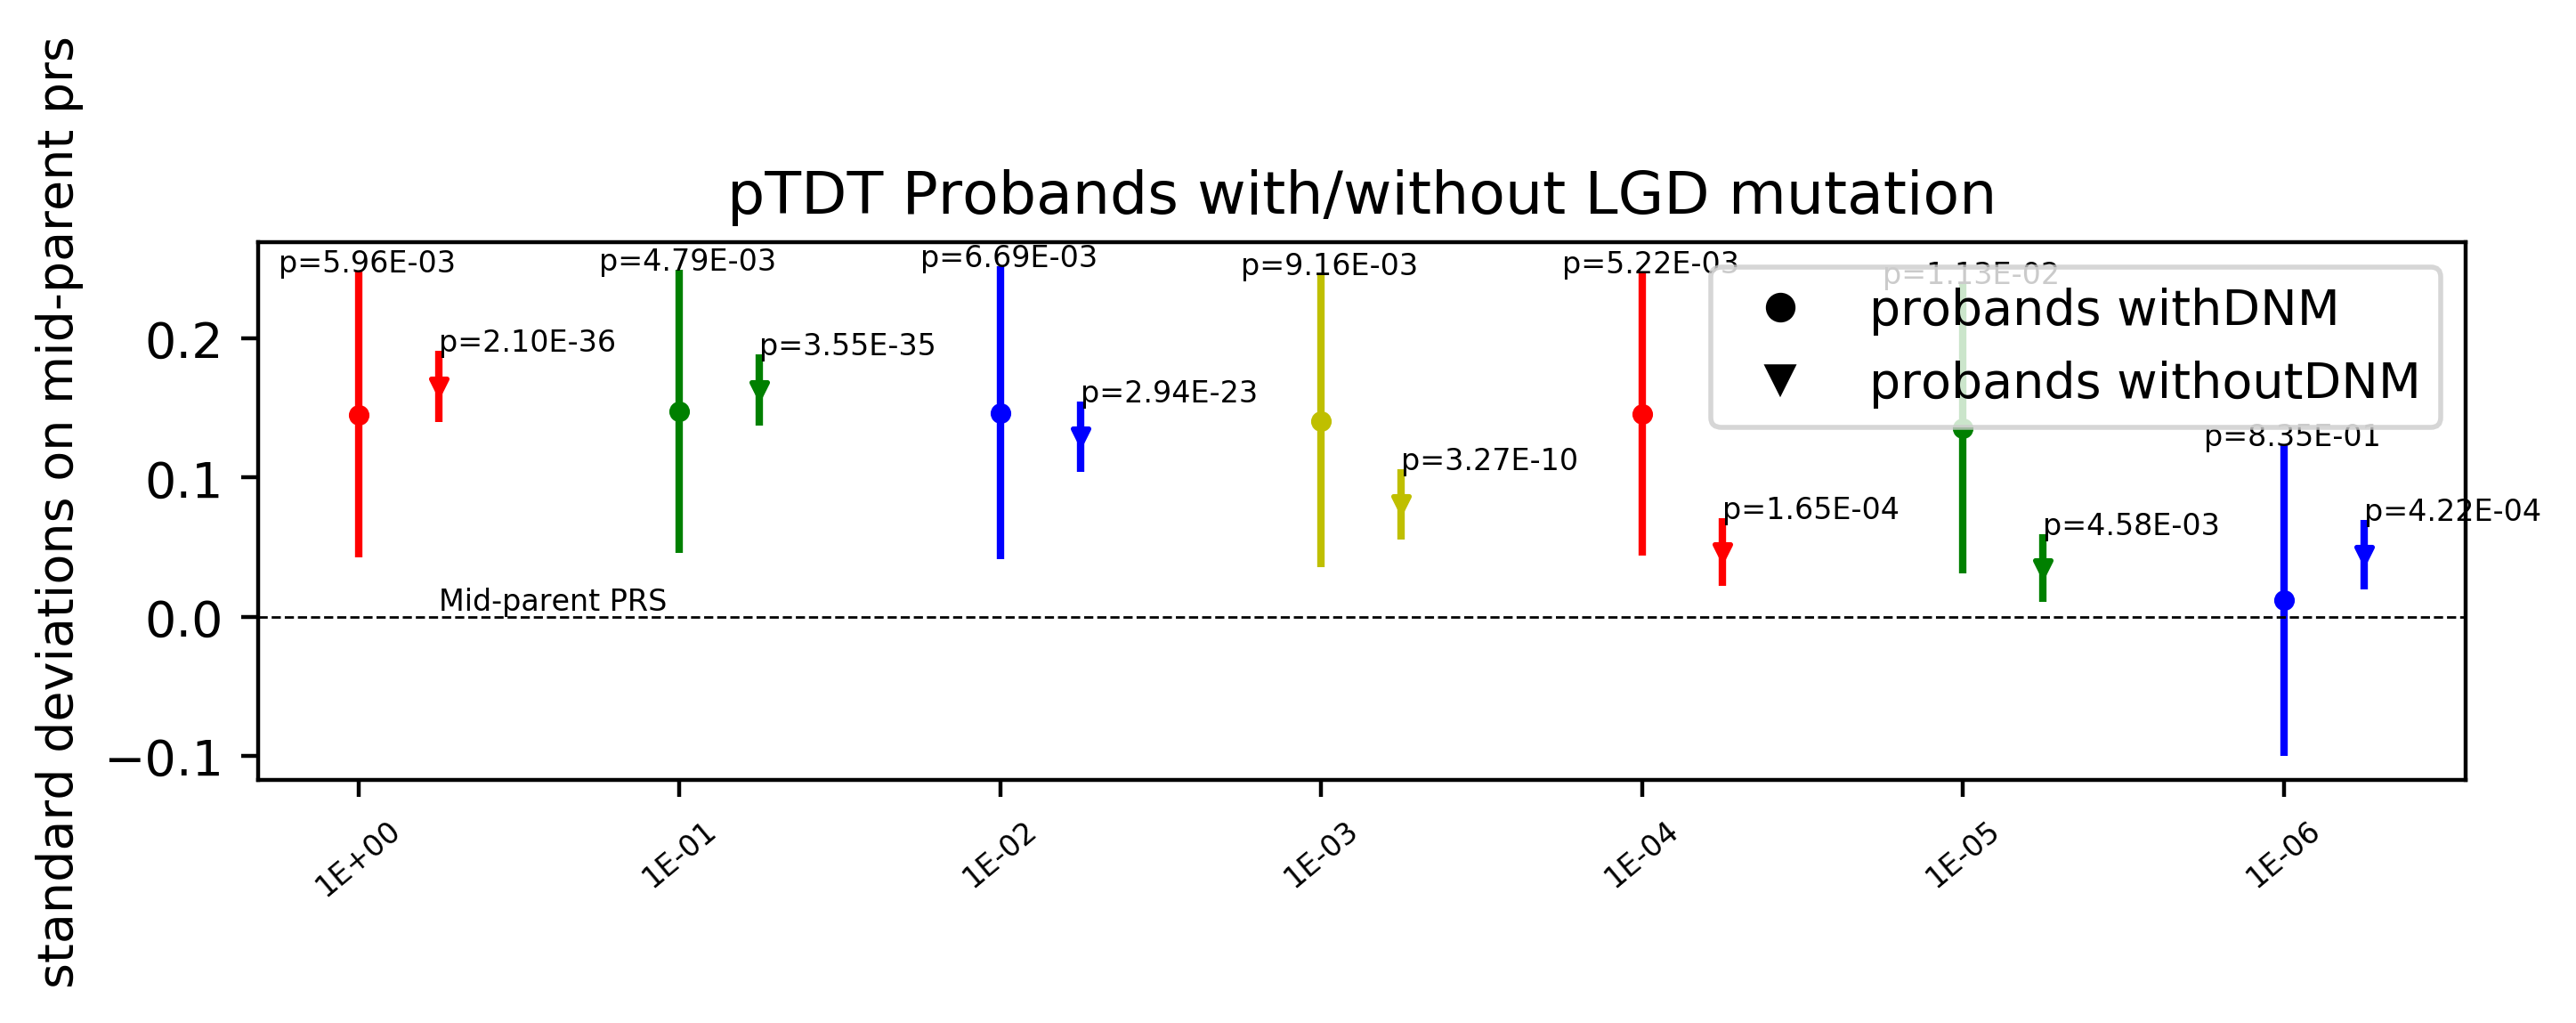

In [201]:
from decimal import Decimal
fig, ax = plt.subplots(figsize=(8,2), dpi=400)
ax.axhline(y=0, c="black", linestyle = "--", linewidth=0.5)
ax.text(0.5, 0.005, "Mid-parent PRS", fontsize=6)
colors = "rgby"
colors = cycle(colors)
x = 0
for i, (S, (pro, sib)) in enumerate(zip(["S1", "S2", "S3", "S4", "S5", "S6", "S7"], Dat2)):
    color = next(colors)
    pro_dev, pro_sd, pro_p = pro
    sib_dev, sib_sd, sib_p = sib
    
    ax.vlines(x, pro_dev-1.96*pro_sd, pro_dev+1.96*pro_sd, color = color)
    ax.scatter(x, pro_dev, marker="o", color = color, s=10, label="d1")
    ax.text(x-0.5, pro_dev+1.96*pro_sd, 'p=%.2E' % Decimal(pro_p), fontsize=6)
    
    ax.vlines(x+0.5, sib_dev-1.96*sib_sd, sib_dev+1.96*sib_sd, color = color)
    ax.scatter(x+0.5, sib_dev, marker="v", color = color, s=10, label="d2")
    ax.text(x+0.5, sib_dev+1.96*sib_sd, 'p=%.2E' % Decimal(sib_p), fontsize=6)
    x += 2
labels = ['%.E' % Decimal(x) for x in [1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]]
plt.title("pTDT Probands with/without LGD mutation")
ax.set_xticks(np.arange(0, x, 2))
ax.set_xticklabels(labels, fontsize=6, rotation=40)
plt.ylabel("standard deviations on mid-parent prs")

import matplotlib.lines as mlines
withDNM = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=5, label='probands withDNM')
withoutDNM = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                          markersize=5, label='probands withoutDNM')

plt.legend(handles=[withDNM, withoutDNM])

plt.show()

In [202]:
Dat21 = []
for S in ["S11", "S12", "S13", "S14", "S15", "S16", "S17"]:
    pro, sib, p = processPRS_PTDT_stratified(S, Probands1, Probands2)
    #print(pro_dev, sib_dev)
    Dat21.append([pro, sib])
    print(pro, sib, p)

(0.10251237264700984, 0.05340875465576211, 0.05610569778078623) (0.1103859783611947, 0.012894658786988112, 1.4199153417749135e-17) 0.886197517596673
(0.11161380789021938, 0.05321797408780768, 0.03696006526555269) (0.1441989984245955, 0.0130617409009187, 4.622019684837884e-28) 0.5583919877959242
(0.10226171271408256, 0.05294437028734403, 0.05458147245316853) (0.12196916350512499, 0.012891254264799836, 4.296436213309074e-21) 0.7199860228041914
(0.07770338451783285, 0.056658436287026936, 0.17174005049636717) (0.0856964820867822, 0.012942905201323098, 3.889905561920665e-11) 0.885274898095528
(0.11326361276703033, 0.0500043246098567, 0.0243268246147313) (0.045523717228824534, 0.012580434113921245, 0.00029897966815475174) 0.20597237921528555
(0.1521909102622718, 0.05074758246392165, 0.0029447673925146653) (0.017582527113433426, 0.01230042196630675, 0.15296870694258752) 0.010322162879816675
(0.011344852632520684, 0.05725000701176168, 0.8432580186128121) (0.04468314014496449, 0.012726111734773

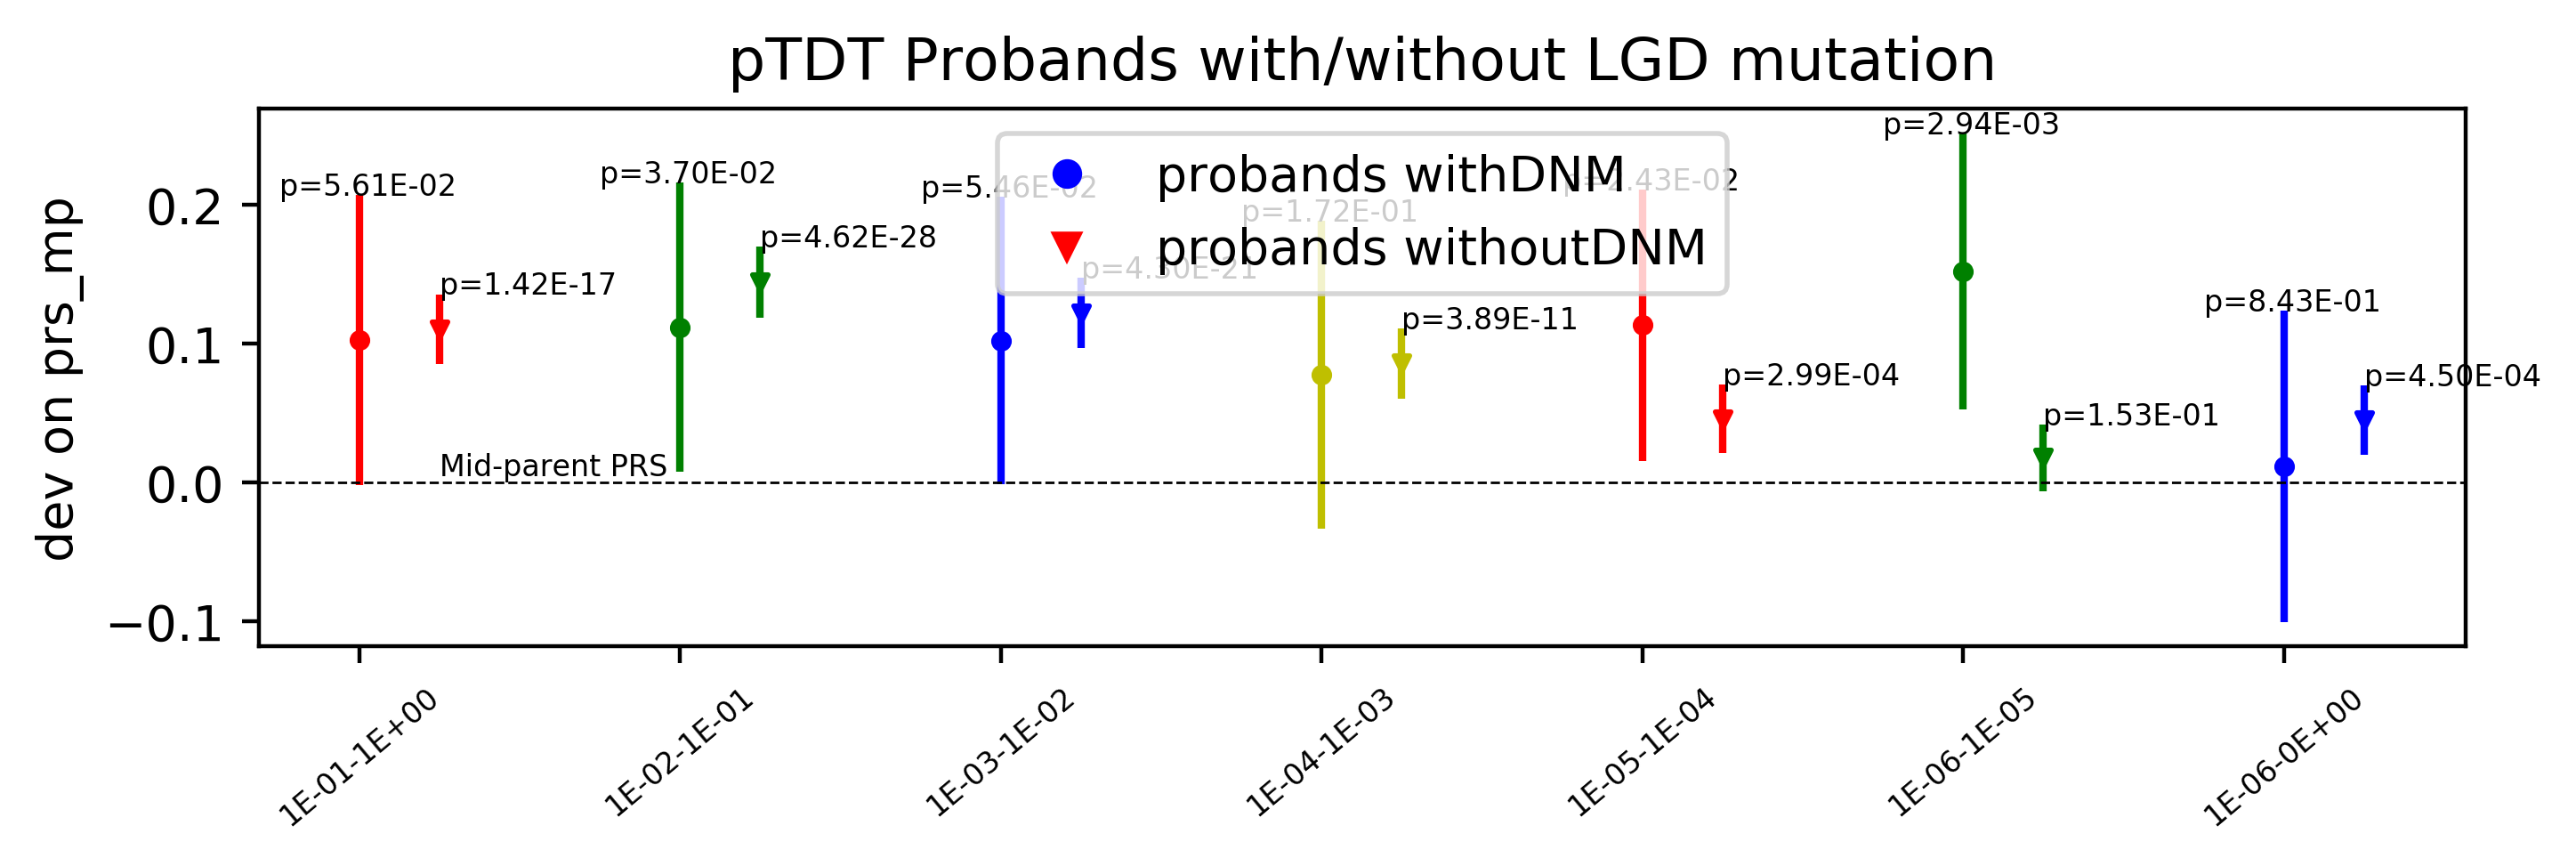

In [203]:
from decimal import Decimal
fig, ax = plt.subplots(figsize=(8,2), dpi=400)
ax.axhline(y=0, c="black", linestyle = "--", linewidth=0.5)
ax.text(0.5, 0.005, "Mid-parent PRS", fontsize=6)
colors = "rgby"
colors = cycle(colors)
x = 0
for i, (S, (pro, sib)) in enumerate(zip(["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S11"], Dat21)):
    color = next(colors)
    pro_dev, pro_sd, pro_p = pro
    sib_dev, sib_sd, sib_p = sib
    
    ax.vlines(x, pro_dev-1.96*pro_sd, pro_dev+1.96*pro_sd, color = color)
    ax.scatter(x, pro_dev, marker="o", color = color, s=10, label="d1")
    ax.text(x-0.5, pro_dev+1.96*pro_sd, 'p=%.2E' % Decimal(pro_p), fontsize=6)
    
    ax.vlines(x+0.5, sib_dev-1.96*sib_sd, sib_dev+1.96*sib_sd, color = color)
    ax.scatter(x+0.5, sib_dev, marker="v", color = color, s=10, label="d2")
    ax.text(x+0.5, sib_dev+1.96*sib_sd, 'p=%.2E' % Decimal(sib_p), fontsize=6)
    x += 2
labels = ['%.E-%.E' % (x/10, x) for x in [1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5]] + ['%.E-%.E' % (1e-6, 0)]
plt.title("pTDT Probands with/without LGD mutation")
ax.set_xticks(np.arange(0, x, 2))
ax.set_xticklabels(labels, fontsize=6, rotation=40)
plt.ylabel("dev on prs_mp")

import matplotlib.lines as mlines
withDNM = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=5, label='probands withDNM')
withoutDNM = mlines.Line2D([], [], color='red', marker='v', linestyle='None',
                          markersize=5, label='probands withoutDNM')

plt.legend(handles=[withDNM, withoutDNM])

plt.show()

In [204]:
FamDat = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/GenoHQ.fam.tsv", delimiter="\t", header=None)
FamDat.columns = ["FamID", "SampleID", "FatherID", "MotherID", "Gender", "Pheno"]
Probands1 = FamDat[(FamDat["Pheno"] == 2) & (FamDat["Gender"] == 1) &
                   (FamDat["FatherID"] != "0") & (FamDat["MotherID"] != "0")].values
Probands2 = FamDat[(FamDat["Pheno"] == 2) & (FamDat["Gender"] == 2) &
                   (FamDat["FatherID"] != "0") & (FamDat["MotherID"] != "0")].values
print(len(Probands1), len(Probands2))

5277 1323


In [205]:
Dat3 = []
for S in ["S1", "S2", "S3", "S4", "S5", "S6", "S7"]:
    pro, sib, p = processPRS_PTDT_stratified(S, Probands1, Probands2)
    #print(pro_dev, sib_dev)
    Dat3.append([pro, sib])
    print(pro, sib)

(0.1653721727602953, 0.014145713895896875, 3.630096803447897e-31) (0.15996907717232184, 0.028330384413957643, 2.0369389648106254e-08)
(0.16087666412954257, 0.01407404812841469, 6.921278819066857e-30) (0.16586090237623818, 0.029053305708537862, 1.4284009640206464e-08)
(0.12989663138598323, 0.014006870116085465, 2.6257279469186802e-20) (0.13201957859395827, 0.028887724155587338, 5.387756180571276e-06)
(0.08411141380263445, 0.013918596864522688, 1.6264239514066943e-09) (0.08473736285863584, 0.02831193781536699, 0.0028258651732239503)
(0.05387471157409887, 0.013455603694604511, 6.331147205310443e-05) (0.04709087328270227, 0.027443606228004826, 0.08654020051546127)
(0.0456503309770262, 0.013466231120341971, 0.0007051898402257326) (0.02059234628273799, 0.027257260410333644, 0.4502742337802452)
(0.0390911918465966, 0.013732626763623997, 0.004440764361232855) (0.058109203032633845, 0.02834243064523741, 0.04061940964605501)


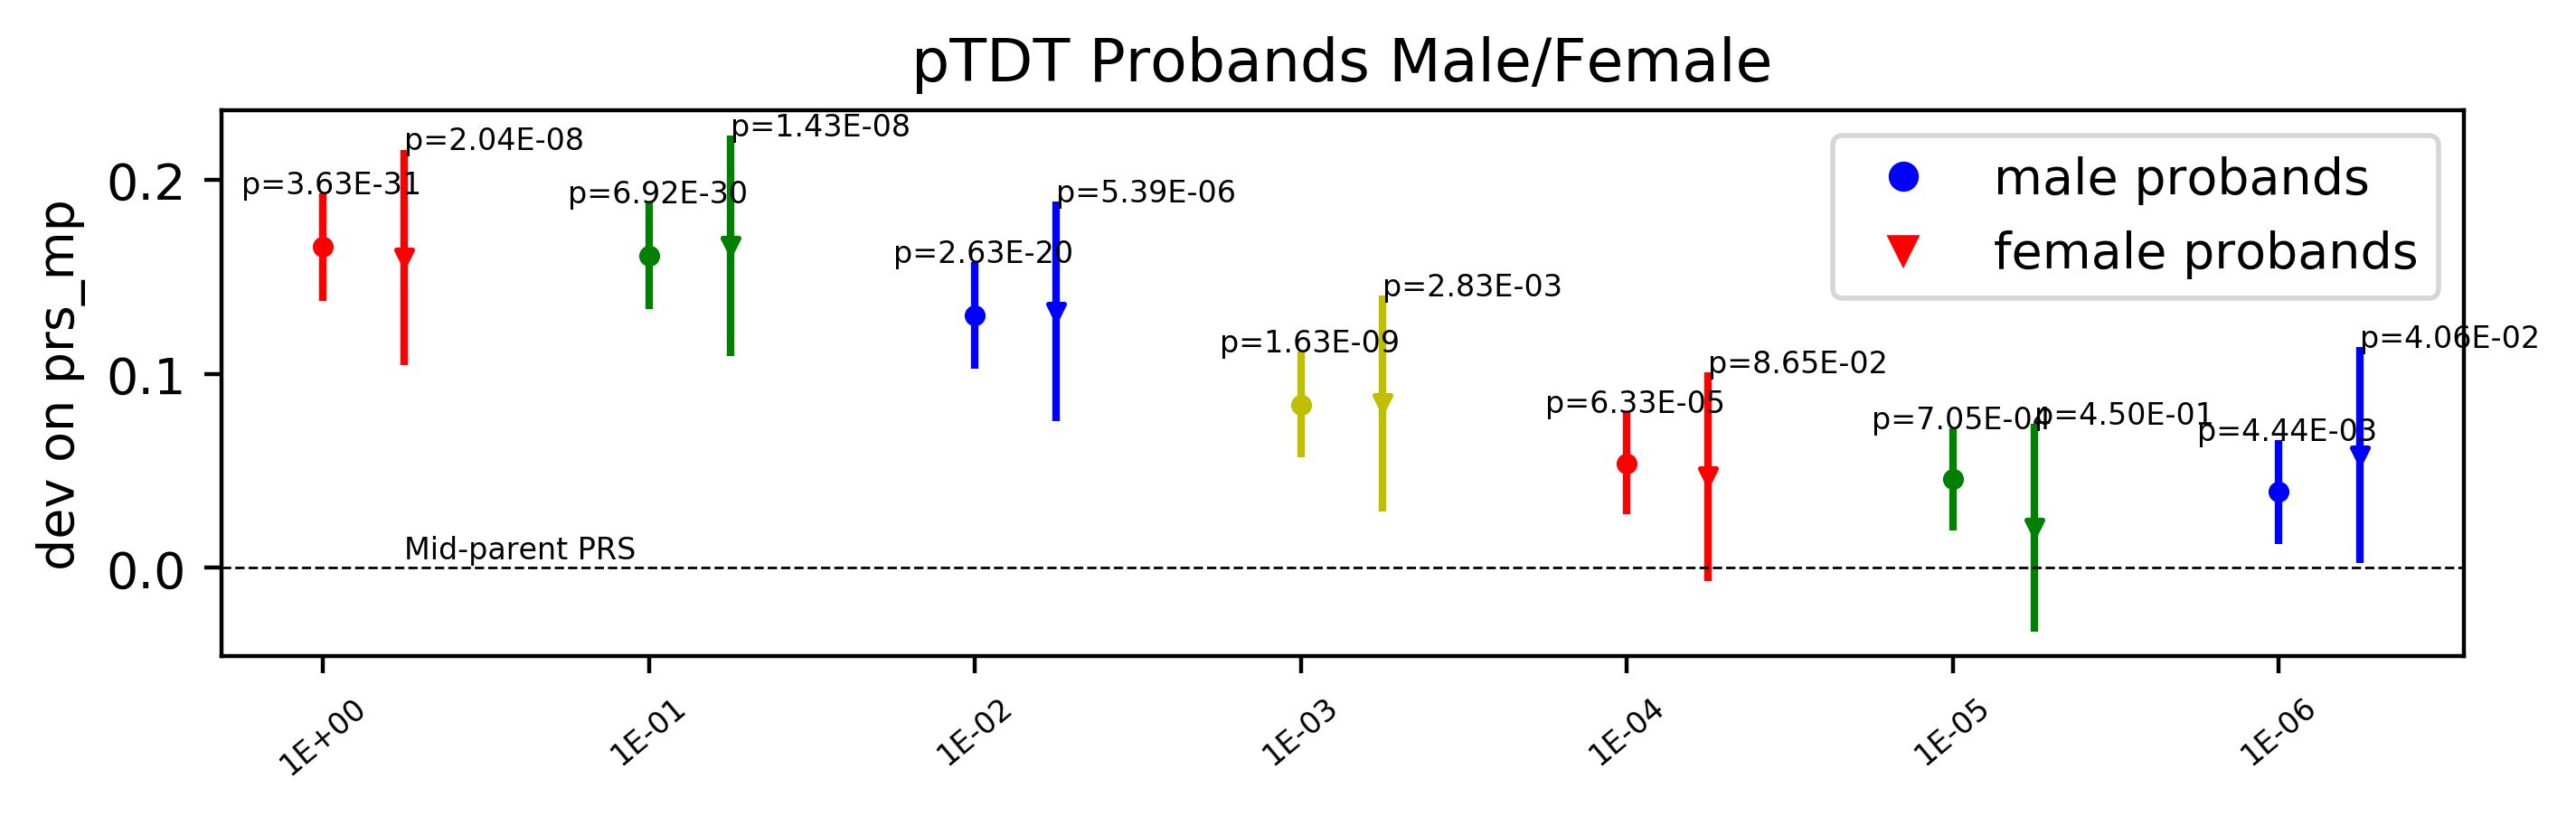

In [206]:
from decimal import Decimal
fig, ax = plt.subplots(figsize=(8,2), dpi=400)
ax.axhline(y=0, c="black", linestyle = "--", linewidth=0.5)
ax.text(0.5, 0.005, "Mid-parent PRS", fontsize=6)
colors = "rgby"
colors = cycle(colors)
x = 0
for i, (S, (pro, sib)) in enumerate(zip(["S1", "S2", "S3", "S4", "S5", "S6", "S7"], Dat3)):
    color = next(colors)
    pro_dev, pro_sd, pro_p = pro
    sib_dev, sib_sd, sib_p = sib
    
    ax.vlines(x, pro_dev-1.96*pro_sd, pro_dev+1.96*pro_sd, color = color)
    ax.scatter(x, pro_dev, marker="o", color = color, s=10, label="d1")
    ax.text(x-0.5, pro_dev+1.96*pro_sd, 'p=%.2E' % Decimal(pro_p), fontsize=6)
    
    ax.vlines(x+0.5, sib_dev-1.96*sib_sd, sib_dev+1.96*sib_sd, color = color)
    ax.scatter(x+0.5, sib_dev, marker="v", color = color, s=10, label="d2")
    ax.text(x+0.5, sib_dev+1.96*sib_sd, 'p=%.2E' % Decimal(sib_p), fontsize=6)
    x += 2
labels = ['%.E' % Decimal(x) for x in [1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]]
plt.title("pTDT Probands Male/Female")
ax.set_xticks(np.arange(0, x, 2))
ax.set_xticklabels(labels, fontsize=6, rotation=40)
plt.ylabel("dev on prs_mp")

import matplotlib.lines as mlines
withDNM = mlines.Line2D([], [], color='blue', marker='o', linestyle='None',
                          markersize=5, label='male probands')
withoutDNM = mlines.Line2D([], [], color='red', marker='v', linestyle='None',
                          markersize=5, label='female probands')

plt.legend(handles=[withDNM, withoutDNM])

plt.show()

In [234]:
master_table = pd.read_excel("/Users/jiayao/Work/spark/dat/30K/SPARK.30K.mastertable.20190327.xlsx")
master_table = master_table[["sfid", "spid", "sex", "asd", "role", "family_type"]]
master_table.head()

,sfid,spid,sex,asd,role,family_type
0,SF0000003,SP0000002,2,1,Mother,Simplex
1,SF0000003,SP0000003,1,2,Proband,Simplex
2,SF0030253,SP0000006,1,1,Father,Simplex
3,SF0031322,SP0000007,2,1,Mother,Simplex
4,SF0013567,SP0000009,1,1,Father,Multiplex


In [130]:
Simplex_probands = master_table[(master_table["asd"] == 2) & (master_table["family_type"] == "Simplex") &
                                (master_table["role"].isin(["Proband", "Sibling"]))]
Multiplex_probands = master_table[(master_table["asd"] == 2) & (master_table["family_type"] == "Multiplex") &
                                (master_table["role"].isin(["Proband", "Sibling"]))]

In [131]:
print(Simplex_probands.shape, Multiplex_probands.shape)
Simplex_probands = Simplex_probands["spid"].values
Multiplex_probands = Multiplex_probands["spid"].values

(7053, 5) (2509, 5)


In [132]:
FamDat = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/GenoHQ.fam.tsv", delimiter="\t", header=None)
FamDat.columns = ["FamID", "SampleID", "FatherID", "MotherID", "Gender", "Pheno"]
Probands1 = FamDat[(FamDat["Pheno"] == 2) & (FamDat["SampleID"].isin(Simplex_probands)) &
                   (FamDat["FatherID"] != "0") & (FamDat["MotherID"] != "0")].values
Probands2 = FamDat[(FamDat["Pheno"] == 2) & (FamDat["SampleID"].isin(Multiplex_probands)) &
                   (FamDat["FatherID"] != "0") & (FamDat["MotherID"] != "0")].values
print(len(Probands1), len(Probands2))

4719 1711


In [133]:
Dat4 = []
for S in ["S1", "S2", "S3", "S4", "S5", "S6", "S7"]:
    pro, sib, p = processPRS_PTDT_stratified(S, Probands1, Probands2)
    #print(pro_dev, sib_dev)
    Dat4.append([pro, sib, p])
    print(pro, sib, p)

(0.1742749741790616, 0.014575738160957393, 1.851542237445774e-32) (0.12137922655869428, 0.02643203433565945, 4.756977800806432e-06) 0.06900369863886788
(0.1655362612972841, 0.01457555175019565, 1.7178802010390838e-29) (0.134616290508949, 0.02651022197313359, 4.290202309355193e-07) 0.28818427376303646
(0.13670578433138297, 0.014770820659766438, 3.240943209280497e-20) (0.10539323620975567, 0.025163909309520057, 2.9783855260473312e-05) 0.27963721788477497
(0.08404331310879858, 0.014534283810168436, 7.88333752651044e-09) (0.06826246886154193, 0.02569971644749856, 0.008000277571261122) 0.5836278357600353
(0.056040869320092085, 0.014196425247083387, 8.029201953061981e-05) (0.03662660886004719, 0.024162386281182172, 0.12986913856670212) 0.48540308153712297
(0.04671440698393235, 0.014204081201026515, 0.001015062381680705) (0.02182290635366037, 0.023894542459114324, 0.3613674690615969) 0.36985188780106104
(0.048378031407995604, 0.014526545022185642, 0.0008754899939650616) (0.030684773863481927,

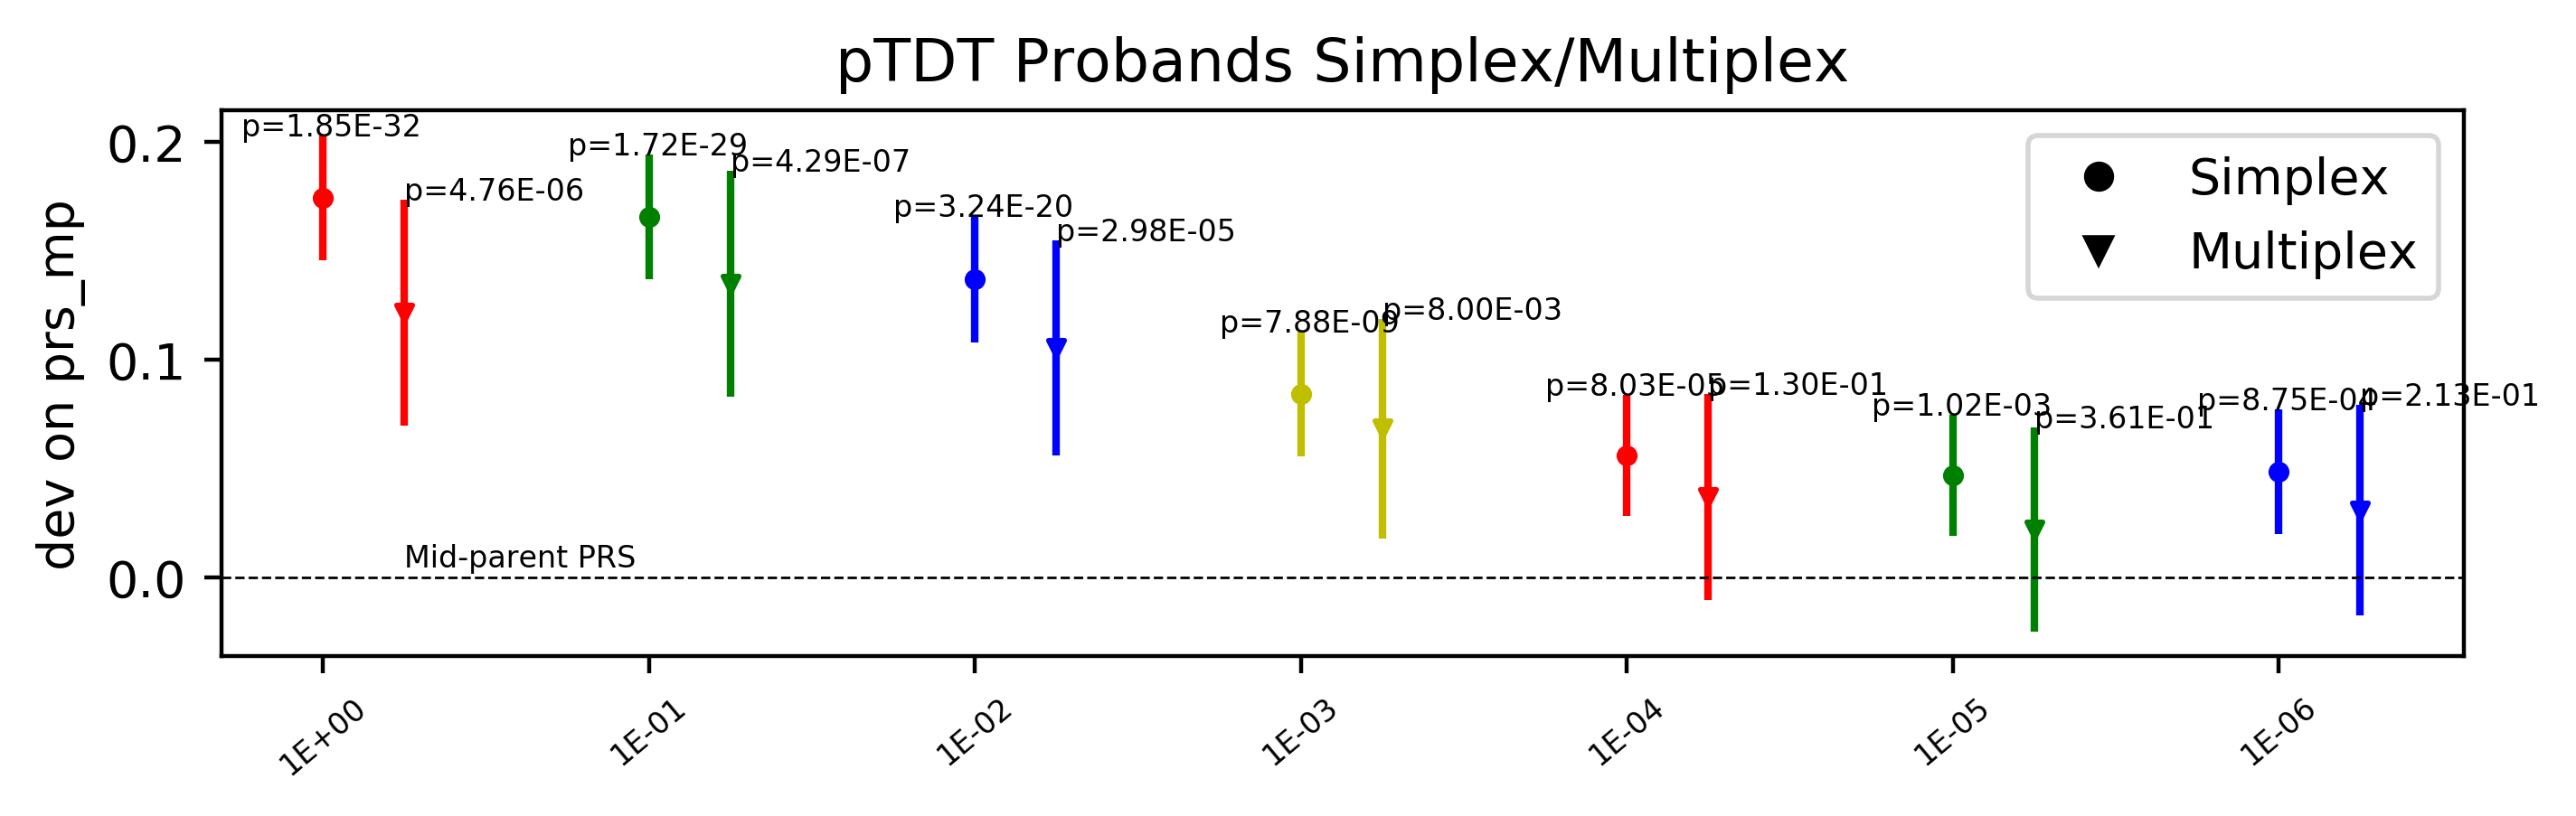

In [176]:
from decimal import Decimal
fig, ax = plt.subplots(figsize=(8,2), dpi=400)
ax.axhline(y=0, c="black", linestyle = "--", linewidth=0.5)
ax.text(0.5, 0.005, "Mid-parent PRS", fontsize=6)
colors = "rgby"
colors = cycle(colors)
x = 0
for i, (S, (pro, sib, p)) in enumerate(zip(["S1", "S2", "S3", "S4", "S5", "S6", "S7"], Dat4)):
    color = next(colors)
    pro_dev, pro_sd, pro_p = pro
    sib_dev, sib_sd, sib_p = sib
    
    ax.vlines(x, pro_dev-1.96*pro_sd, pro_dev+1.96*pro_sd, color = color)
    ax.scatter(x, pro_dev, marker="o", color = color, s=10, label="d1")
    ax.text(x-0.5, pro_dev+1.96*pro_sd, 'p=%.2E' % Decimal(pro_p), fontsize=6)
    
    ax.vlines(x+0.5, sib_dev-1.96*sib_sd, sib_dev+1.96*sib_sd, color = color)
    ax.scatter(x+0.5, sib_dev, marker="v", color = color, s=10, label="d2")
    ax.text(x+0.5, sib_dev+1.96*sib_sd, 'p=%.2E' % Decimal(sib_p), fontsize=6)
    x += 2
labels = ['%.E' % Decimal(x) for x in [1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]]
plt.title("pTDT Probands Simplex/Multiplex")
ax.set_xticks(np.arange(0, x, 2))
ax.set_xticklabels(labels, fontsize=6, rotation=40)
plt.ylabel("dev on prs_mp")

import matplotlib.lines as mlines
withDNM = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=5, label='Simplex')
withoutDNM = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                          markersize=5, label='Multiplex')

plt.legend(handles=[withDNM, withoutDNM])

plt.show()

In [207]:
S="S1"
PRS = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/plink.{}.profile.tsv".format(S), delimiter="\t")
ID2Score = dict(zip(PRS["IID"].values, PRS["SCORE"].values))
PRS.head(3)

,FID,IID,PHENO,CNT,CNT2,SCORE
0,SF0000003,SP0000002,1,608252,467549,-0.069896
1,SF0000003,SP0000003,2,608306,467040,-0.070071
2,SF0030253,SP0000006,1,609096,464399,-0.068691


In [208]:
MidPrs1 = []
ProbPrs1 = []
MidPrs2 = []
ProbPrs2 = []
for row in FamDat.iterrows():
    row = row[1]
    try:
        prob_prs = ID2Score[row["SampleID"]]
        FaPrs = ID2Score[row["FatherID"]]
        MoPrs = ID2Score[row["MotherID"]]
        mid_prs = (FaPrs+MoPrs)/2
        if row["SampleID"] in Simplex_probands:
            MidPrs1.append(mid_prs)
            ProbPrs1.append(prob_prs)
        elif row["SampleID"] in Multiplex_probands:
            MidPrs2.append(mid_prs)
            ProbPrs2.append(prob_prs)
    except:
        continue

-0.06984421594218648 -0.06985814544632087 1.3929504134382875e-05


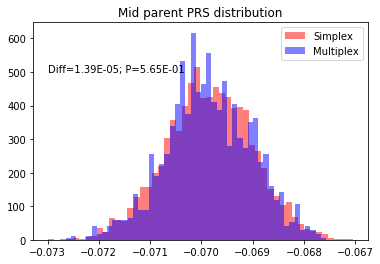

Ttest_indResult(statistic=0.5759165502135585, pvalue=0.5646923011758225)

In [226]:
plt.hist(MidPrs1, color="red", alpha=0.5, bins=50, density=1, label="Simplex")
plt.hist(MidPrs2, color="blue", alpha=0.5, bins=50, density=1, label="Multiplex")
mean_simplex = np.mean(MidPrs1)
mean_multplex = np.mean(MidPrs2)
print(mean_simplex, mean_multplex, mean_simplex-mean_multplex)
plt.title("Mid parent PRS distribution")
t, p = stats.ttest_ind(MidPrs1, MidPrs2)
plt.text(-0.073, 500, "Diff=%0.2E; P=%0.2E"%(mean_simplex-mean_multplex, p))
plt.legend()
plt.show()
stats.ttest_ind(MidPrs1, MidPrs2)

-0.06969575579221908 -0.06976081151990349 6.505572768440715e-05


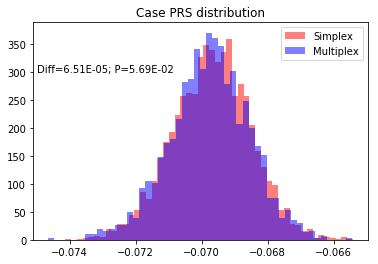

In [230]:
plt.hist(ProbPrs1, color="red", alpha=0.5, bins=50, density=1, label="Simplex")
plt.hist(ProbPrs2, color="blue", alpha=0.5, bins=50, density=1, label="Multiplex")
plt.title("Case PRS distribution")
mean_simplex = np.mean(ProbPrs1)
mean_multplex = np.mean(ProbPrs2)
print(mean_simplex, mean_multplex, mean_simplex-mean_multplex)
t, p = stats.ttest_ind(ProbPrs1, ProbPrs2)
plt.text(-0.075, 300, "Diff=%0.2E; P=%0.2E"%(mean_simplex-mean_multplex, p))
plt.legend()
plt.show()

In [232]:
master_table.head(2)

,sfid,spid,asd,role,family_type
0,SF0000003,SP0000002,1,Mother,Simplex
1,SF0000003,SP0000003,2,Proband,Simplex


In [241]:
# Simplex Multiplex
Multiplex_mal = master_table[(master_table["asd"] == 2) & (master_table["family_type"] == "Simplex") &
                                (master_table["role"].isin(["Proband", "Sibling"])) & (master_table["sex"]==1)]
Multiplex_fem = master_table[(master_table["asd"] == 2) & (master_table["family_type"] == "Simplex") &
                                (master_table["role"].isin(["Proband", "Sibling"])) & (master_table["sex"]==2)]
print(Multiplex_mal.shape, Multiplex_fem.shape)
Multiplex_mals = Multiplex_mal["spid"].values
Multiplex_fems = Multiplex_fem["spid"].values

(5710, 6) (1343, 6)


In [242]:
MidPrs1 = []
ProbPrs1 = []
MidPrs2 = []
ProbPrs2 = []
for row in FamDat.iterrows():
    row = row[1]
    try:
        prob_prs = ID2Score[row["SampleID"]]
        FaPrs = ID2Score[row["FatherID"]]
        MoPrs = ID2Score[row["MotherID"]]
        mid_prs = (FaPrs+MoPrs)/2
        if row["SampleID"] in Multiplex_mals:
            MidPrs1.append(mid_prs)
            ProbPrs1.append(prob_prs)
        elif row["SampleID"] in Multiplex_fems:
            MidPrs2.append(mid_prs)
            ProbPrs2.append(prob_prs)
    except:
        continue

-0.06985108596890914 -0.06981475379310345 -3.633217580568948e-05


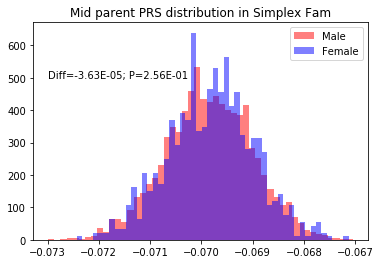

Ttest_indResult(statistic=-1.1362846269393985, pvalue=0.25589666811953055)

In [245]:
plt.hist(MidPrs1, color="red", alpha=0.5, bins=50, density=1, label="Male")
plt.hist(MidPrs2, color="blue", alpha=0.5, bins=50, density=1, label="Female")
mean_simplex = np.mean(MidPrs1)
mean_multplex = np.mean(MidPrs2)
print(mean_simplex, mean_multplex, mean_simplex-mean_multplex)
plt.title("Mid parent PRS distribution in Simplex Fam")
t, p = stats.ttest_ind(MidPrs1, MidPrs2)
plt.text(-0.073, 500, "Diff=%0.2E; P=%0.2E"%(mean_simplex-mean_multplex, p))
plt.legend()
plt.show()
stats.ttest_ind(MidPrs1, MidPrs2)

-0.06970437518091664 -0.06965879149425287 -4.558368666376933e-05


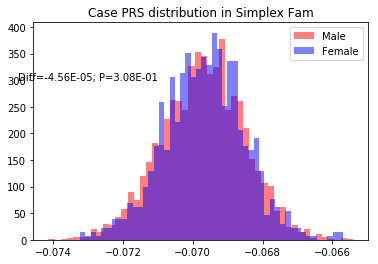

In [246]:
plt.hist(ProbPrs1, color="red", alpha=0.5, bins=50, density=1, label="Male")
plt.hist(ProbPrs2, color="blue", alpha=0.5, bins=50, density=1, label="Female")
plt.title("Case PRS distribution in Simplex Fam")
mean_simplex = np.mean(ProbPrs1)
mean_multplex = np.mean(ProbPrs2)
print(mean_simplex, mean_multplex, mean_simplex-mean_multplex)
t, p = stats.ttest_ind(ProbPrs1, ProbPrs2)
plt.text(-0.075, 300, "Diff=%0.2E; P=%0.2E"%(mean_simplex-mean_multplex, p))
plt.legend()
plt.show()

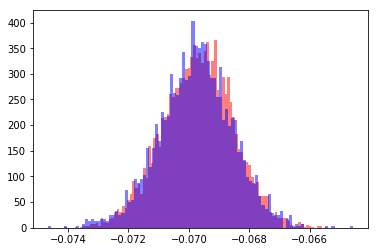

-0.06969643453331399 -0.06976365962655602 6.72250932420293e-05


In [231]:
Simplex_prs = PRS[PRS["IID"].isin(Simplex_probands)]["SCORE"].values
Multiplex_prs = PRS[PRS["IID"].isin(Multiplex_probands)]["SCORE"].values
plt.hist(Simplex_prs, color="red", alpha=0.5, bins=100, density=1)
plt.hist(Multiplex_prs, color="blue", alpha=0.5, bins=100, density=1)
plt.show()
mean_simplex = np.mean(Simplex_prs)
mean_multplex = np.mean(Multiplex_prs)
print(mean_simplex, mean_multplex, mean_simplex-mean_multplex)

In [212]:
stats.ttest_ind(Simplex_prs, Multiplex_prs)

Ttest_indResult(statistic=2.3873915016456086, pvalue=0.016988268647188377)

In [138]:
FamDat = pd.read_csv("/Users/jiayao/Work/spark/dat/30K/GWAS/spark_prs/GenoHQ.fam.tsv", delimiter="\t", header=None)
FamDat.columns = ["FamID", "SampleID", "FatherID", "MotherID", "Gender", "Pheno"]
Probands1 = FamDat[(FamDat["Pheno"] == 2)  &
                   (FamDat["FatherID"] != "0") & (FamDat["MotherID"] != "0")].values
Probands2 = FamDat[(FamDat["Pheno"] == 1)  &
                   (FamDat["FatherID"] != "0") & (FamDat["MotherID"] != "0")].values
print(len(Probands1), len(Probands2))

6547 3047


In [140]:
Dat5 = []
for S in ["S1", "S2", "S3", "S4", "S5", "S6", "S7"]:
    pro, sib,p = processPRS_PTDT_stratified(S, Probands1, Probands2)
    #print(pro_dev, sib_dev)
    Dat5.append([pro, sib])
    print(pro, sib)

(0.16484241311085154, 0.0127292453681813, 7.255778311778352e-38) (-0.01145790268828576, 0.018802131733837206, 0.5423800150345222)
(0.16205460149384715, 0.012736923878279295, 1.2568614805780772e-36) (-0.02501008366076824, 0.01907871473286848, 0.19007412915853358)
(0.13071953061317268, 0.012657272244610007, 8.411325526924726e-25) (-0.0383233597990144, 0.018787952856994895, 0.041496571663627864)
(0.08296467333474784, 0.01256642438907781, 4.4014452559939284e-11) (-0.025473617916718046, 0.01814032847682595, 0.1604213833695088)
(0.05249173451879941, 0.012158304200731527, 1.605858058003606e-05) (-0.016522875908666027, 0.01752571160296013, 0.3459544760262597)
(0.039733373431776804, 0.012141444034120112, 0.0010726014113197114) (-0.023230596890422676, 0.017410425725834126, 0.18228701780284556)
(0.04215105800308634, 0.012430068210348854, 0.0007012223635581504) (-0.033532769779726634, 0.018070587297293113, 0.06364887660002237)


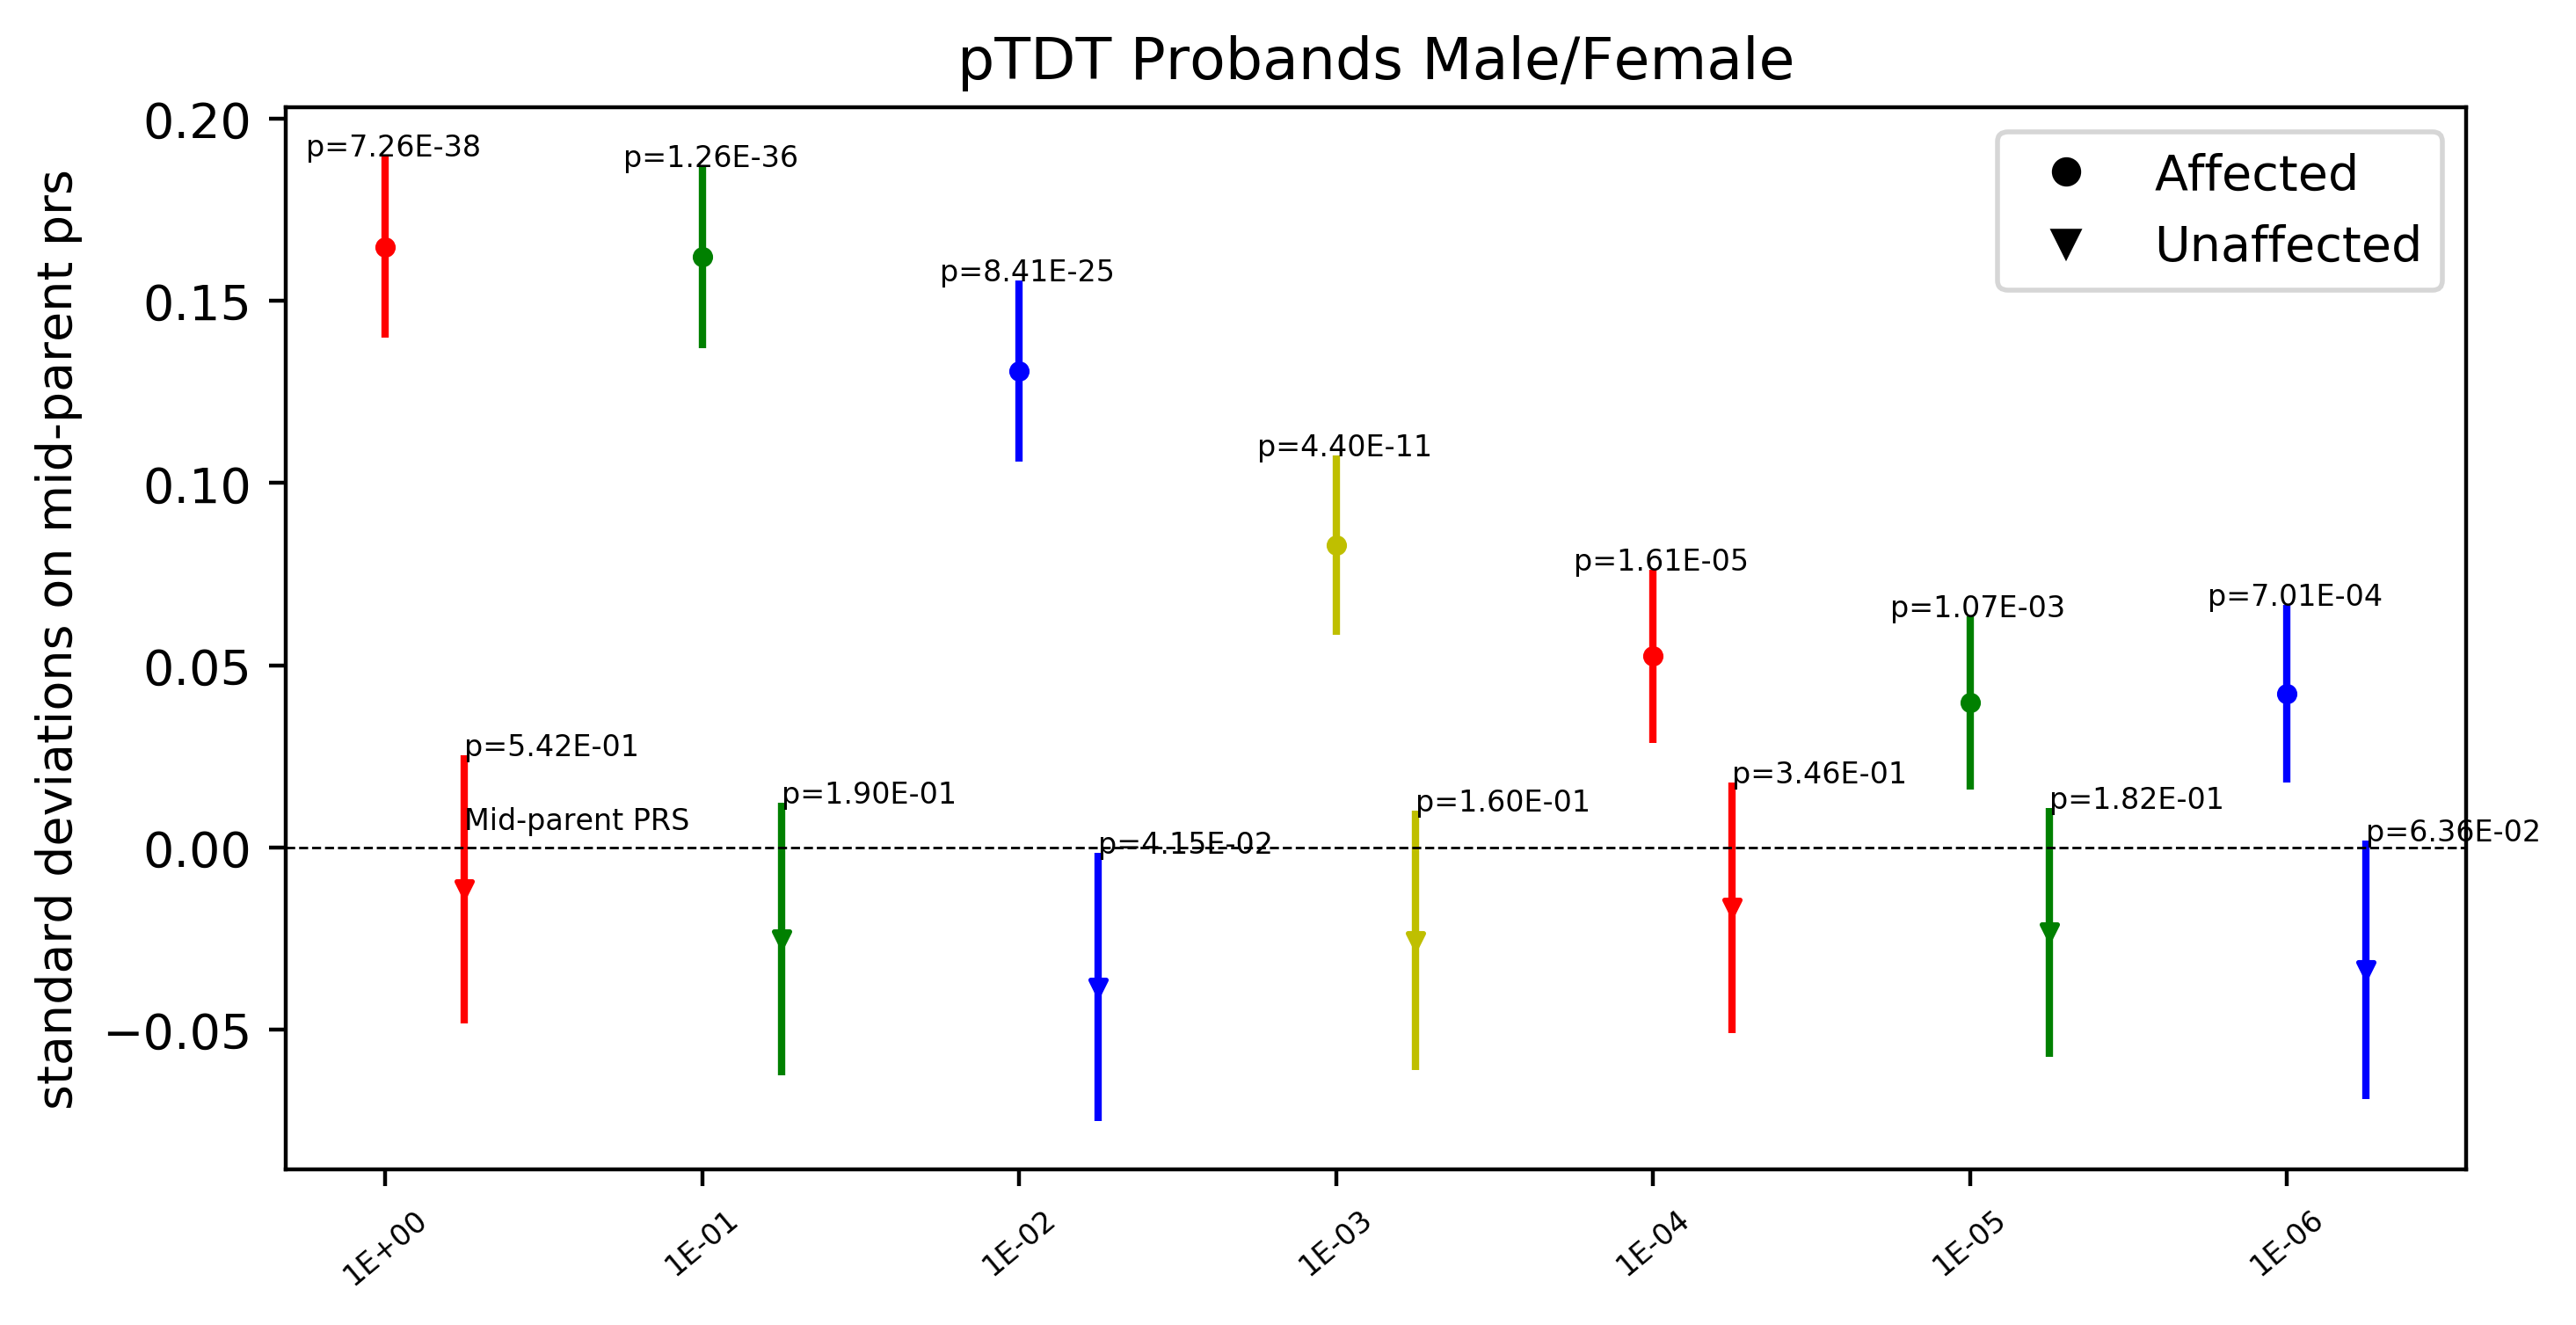

In [141]:
from decimal import Decimal
fig, ax = plt.subplots(figsize=(8,4), dpi=400)
ax.axhline(y=0, c="black", linestyle = "--", linewidth=0.5)
ax.text(0.5, 0.005, "Mid-parent PRS", fontsize=6)
colors = "rgby"
colors = cycle(colors)
x = 0
for i, (S, (pro, sib)) in enumerate(zip(["S1", "S2", "S3", "S4", "S5", "S6", "S7"], Dat5)):
    color = next(colors)
    pro_dev, pro_sd, pro_p = pro
    sib_dev, sib_sd, sib_p = sib
    
    ax.vlines(x, pro_dev-1.96*pro_sd, pro_dev+1.96*pro_sd, color = color)
    ax.scatter(x, pro_dev, marker="o", color = color, s=10, label="d1")
    ax.text(x-0.5, pro_dev+1.96*pro_sd, 'p=%.2E' % Decimal(pro_p), fontsize=6)
    
    ax.vlines(x+0.5, sib_dev-1.96*sib_sd, sib_dev+1.96*sib_sd, color = color)
    ax.scatter(x+0.5, sib_dev, marker="v", color = color, s=10, label="d2")
    ax.text(x+0.5, sib_dev+1.96*sib_sd, 'p=%.2E' % Decimal(sib_p), fontsize=6)
    x += 2
labels = ['%.E' % Decimal(x) for x in [1,1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]]
plt.title("pTDT Probands Male/Female")
ax.set_xticks(np.arange(0, x, 2))
ax.set_xticklabels(labels, fontsize=6, rotation=40)
plt.ylabel("standard deviations on mid-parent prs")

import matplotlib.lines as mlines
withDNM = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=5, label='Affected')
withoutDNM = mlines.Line2D([], [], color='black', marker='v', linestyle='None',
                          markersize=5, label='Unaffected')

plt.legend(handles=[withDNM, withoutDNM])

plt.show()

In [ ]:
6281 -  5277